In [1]:
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.stats import chi2_contingency


In [2]:
# matplotlib 한글 사용

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

csv파일 불러오기

In [3]:
bus_df = pd.read_csv("../Mook/transportation_bus.csv")
train_df = pd.read_csv("../Mook/transportation_train.csv")
weather_df = pd.read_csv("data/m_df.csv")

In [4]:
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1019 non-null   object 
 1   total_passenger     1019 non-null   float64
 2   commute_passenger   1019 non-null   float64
 3   other_passenger     1019 non-null   float64
 4   holiday_or_weekend  1019 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 39.9+ KB


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1020 non-null   object 
 1   total_passenger     1020 non-null   float64
 2   commute_passenger   1020 non-null   float64
 3   other_passenger     1020 non-null   float64
 4   holiday_or_weekend  1020 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 40.0+ KB


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1399 non-null   int64  
 1   date           1399 non-null   object 
 2   fine_dust      1399 non-null   float64
 3   precipitation  1399 non-null   float64
 4   snow_depth     1399 non-null   float64
 5   day_type       1399 non-null   object 
 6   season         1399 non-null   object 
 7   year           1399 non-null   int64  
 8   fd_grade       1399 non-null   object 
 9   p_grade        1399 non-null   object 
 10  s_grade        1399 non-null   object 
 11  snow_depth.1   1399 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 131.3+ KB


데이터프레임 합치기

In [7]:
bus_df.columns=(["date", "bus_total", "bus_commute", "bus_other", "holiday_or_weekend"])
train_df.columns=(["date", "train_total", "train_commute", "train_other", "holiday_or_weekend"])

In [8]:
bus_df.head(3), train_df.head(3), bus_df.tail(3), train_df.tail(3)

(         date  bus_total  bus_commute  bus_other  holiday_or_weekend
 0  2022-01-01  1858954.0     519623.0  1339331.0                   1
 1  2022-01-02  2048632.0     579340.0  1469292.0                   1
 2  2022-01-03  4028715.0    1793953.0  2234762.0                   0,
          date  train_total  train_commute  train_other  holiday_or_weekend
 0  2022-01-01    1792725.0       502533.0    1290192.0                   1
 1  2022-01-02    2053208.0       608212.0    1444996.0                   1
 2  2022-01-03    4487668.0      2285899.0    2201769.0                   0,
             date  bus_total  bus_commute  bus_other  holiday_or_weekend
 1016  2024-10-28  4900706.0    2052646.0  2848060.0                   0
 1017  2024-10-29  5017336.0    2095851.0  2921485.0                   0
 1018  2024-10-30  5092649.0    2111786.0  2980863.0                   0,
             date  train_total  train_commute  train_other  holiday_or_weekend
 1017  2024-10-28    5645227.0      263581

In [9]:
bus_df.info(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1019 non-null   object 
 1   bus_total           1019 non-null   float64
 2   bus_commute         1019 non-null   float64
 3   bus_other           1019 non-null   float64
 4   holiday_or_weekend  1019 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 39.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1020 non-null   object 
 1   train_total         1020 non-null   float64
 2   train_commute       1020 non-null   float64
 3   train_other         1020 non-null   float64
 4   holiday_or_weekend  1020 non-null   int64  
dtypes: float64(3), int64(1), object(1)

(None, None)

In [10]:
loc_bus_df = bus_df.iloc[:, 0:4]
loc_train_df = train_df
public_transport = pd.merge(loc_bus_df, loc_train_df, how="outer", on="date")
public_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1023 non-null   object 
 1   bus_total           1019 non-null   float64
 2   bus_commute         1019 non-null   float64
 3   bus_other           1019 non-null   float64
 4   train_total         1020 non-null   float64
 5   train_commute       1020 non-null   float64
 6   train_other         1020 non-null   float64
 7   holiday_or_weekend  1020 non-null   float64
dtypes: float64(7), object(1)
memory usage: 64.1+ KB


In [13]:
# public_transport = public_transport.drop(columns=["ID"])
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1399 non-null   int64  
 1   date           1399 non-null   object 
 2   fine_dust      1399 non-null   float64
 3   precipitation  1399 non-null   float64
 4   snow_depth     1399 non-null   float64
 5   day_type       1399 non-null   object 
 6   season         1399 non-null   object 
 7   year           1399 non-null   int64  
 8   fd_grade       1399 non-null   object 
 9   p_grade        1399 non-null   object 
 10  s_grade        1399 non-null   object 
 11  snow_depth.1   1399 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 131.3+ KB


In [15]:
weather_df = weather_df.loc[:, ["date", "fine_dust", "precipitation", "snow_depth", "day_type", "season", "year", "fd_grade", "p_grade", "s_grade"]]
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1399 non-null   object 
 1   fine_dust      1399 non-null   float64
 2   precipitation  1399 non-null   float64
 3   snow_depth     1399 non-null   float64
 4   day_type       1399 non-null   object 
 5   season         1399 non-null   object 
 6   year           1399 non-null   int64  
 7   fd_grade       1399 non-null   object 
 8   p_grade        1399 non-null   object 
 9   s_grade        1399 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 109.4+ KB


In [16]:
weather_df.head(), weather_df.tail()

(         date  fine_dust  precipitation  snow_depth day_type  season  year  \
 0  2021-01-01       36.0            0.0         0.0  Weekend  Winter  2021   
 1  2021-01-02       43.0            0.0         0.0  Weekend  Winter  2021   
 2  2021-01-03       47.0            0.0         0.0  Weekend  Winter  2021   
 3  2021-01-04       50.0            0.0         0.0  Weekday  Winter  2021   
 4  2021-01-05       37.0            0.0         0.0  Weekday  Winter  2021   
 
   fd_grade p_grade  s_grade  
 0   Normal     Dry  No_Snow  
 1   Normal     Dry  No_Snow  
 2   Normal     Dry  No_Snow  
 3   Normal     Dry  No_Snow  
 4   Normal     Dry  No_Snow  ,
             date  fine_dust  precipitation  snow_depth day_type season  year  \
 1394  2024-10-26  26.000000            0.0         0.0  Weekend   Fall  2024   
 1395  2024-10-27  27.000000            0.0         0.0  Weekend   Fall  2024   
 1396  2024-10-28  38.000000            0.0         0.0  Weekday   Fall  2024   
 1397  2024-1

In [17]:
merge_df = pd.merge(public_transport, weather_df, how="outer", on="date")
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1399 non-null   object 
 1   bus_total           1019 non-null   float64
 2   bus_commute         1019 non-null   float64
 3   bus_other           1019 non-null   float64
 4   train_total         1020 non-null   float64
 5   train_commute       1020 non-null   float64
 6   train_other         1020 non-null   float64
 7   holiday_or_weekend  1020 non-null   float64
 8   fine_dust           1399 non-null   float64
 9   precipitation       1399 non-null   float64
 10  snow_depth          1399 non-null   float64
 11  day_type            1399 non-null   object 
 12  season              1399 non-null   object 
 13  year                1399 non-null   int64  
 14  fd_grade            1399 non-null   object 
 15  p_grade             1399 non-null   object 
 16  s_grad

In [18]:
public_transport.head(), public_transport.tail()

(         date  bus_total  bus_commute  bus_other  train_total  train_commute  \
 0  2022-01-01  1858954.0     519623.0  1339331.0    1792725.0       502533.0   
 1  2022-01-02  2048632.0     579340.0  1469292.0    2053208.0       608212.0   
 2  2022-01-03  4028715.0    1793953.0  2234762.0    4487668.0      2285899.0   
 3  2022-01-04  4151012.0    1823826.0  2327186.0    4648008.0      2316071.0   
 4  2022-01-05  4151012.0    1823826.0  2327186.0    4648008.0      2316071.0   
 
    train_other  holiday_or_weekend  
 0    1290192.0                 1.0  
 1    1444996.0                 1.0  
 2    2201769.0                 0.0  
 3    2331937.0                 0.0  
 4    2331937.0                 0.0  ,
             date  bus_total  bus_commute  bus_other  train_total  \
 1018  2024-10-26  4026928.0    1194663.0  2832265.0    4561254.0   
 1019  2024-10-27  2991012.0     860873.0  2130139.0    3490702.0   
 1020  2024-10-28  4900706.0    2052646.0  2848060.0    5645227.0   
 1021  

결측치 해결하기

In [19]:
# 결측치 존재 확인
merge_df.isna().sum()

date                    0
bus_total             380
bus_commute           380
bus_other             380
train_total           379
train_commute         379
train_other           379
holiday_or_weekend    379
fine_dust               0
precipitation           0
snow_depth              0
day_type                0
season                  0
year                    0
fd_grade                0
p_grade                 0
s_grade                 0
dtype: int64

In [20]:
# 결측치 처리 ver1
# 결측치행 없애기

dropna_merge_df = merge_df.dropna(axis=0, how='any', subset=None, inplace=False)
dropna_merge_df.isna().sum()

date                  0
bus_total             0
bus_commute           0
bus_other             0
train_total           0
train_commute         0
train_other           0
holiday_or_weekend    0
fine_dust             0
precipitation         0
snow_depth            0
day_type              0
season                0
year                  0
fd_grade              0
p_grade               0
s_grade               0
dtype: int64

In [21]:
# 결측치 처리 ver2
# 날씨와 대중교통의 교집합이되지 못하는 행은 없애고, 교집합이면서 없는 행은 평균으로 채우기

# 교집합이 아닌 행 없애기
# loc_merge_df = merge_df.loc[365:, :]
# loc_merge_df.isna().sum()

In [22]:
# 교집합인 부분에 대해 평균으로 채우기 - 1

# 결측행 찾기
# loc_merge_df[loc_merge_df['train_other'].isna()]
# 628, 661, 711, 850, 1100, 1182, 1243, 1244, 1252, 1309

In [23]:
# 교집합인 부분에 대해 평균으로 채우기 - 2

# loc_merge_df["bus_total"] = loc_merge_df["bus_total"].fillna(loc_merge_df.bus_total.mean())
# loc_merge_df["bus_commute"] = loc_merge_df["bus_commute"].fillna(loc_merge_df.bus_commute.mean())
# loc_merge_df["bus_other"] = loc_merge_df["bus_other"].fillna(loc_merge_df.bus_other.mean())
# loc_merge_df["train_total"] = loc_merge_df["train_total"].fillna(loc_merge_df.train_total.mean())
# loc_merge_df["train_commute"] = loc_merge_df["train_commute"].fillna(loc_merge_df.train_commute.mean())
# loc_merge_df["train_other"] = loc_merge_df["train_other"].fillna(loc_merge_df.train_other.mean())

# # 결측치 유무 확인
# loc_merge_df[loc_merge_df['train_other'].isna()]

컬럼 자료형 변환

In [24]:
# date 컬럼을 datetime 형식으로 변환
dropna_merge_df['date'] = pd.to_datetime(dropna_merge_df['date'])
dropna_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 365 to 1398
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1016 non-null   datetime64[ns]
 1   bus_total           1016 non-null   float64       
 2   bus_commute         1016 non-null   float64       
 3   bus_other           1016 non-null   float64       
 4   train_total         1016 non-null   float64       
 5   train_commute       1016 non-null   float64       
 6   train_other         1016 non-null   float64       
 7   holiday_or_weekend  1016 non-null   float64       
 8   fine_dust           1016 non-null   float64       
 9   precipitation       1016 non-null   float64       
 10  snow_depth          1016 non-null   float64       
 11  day_type            1016 non-null   object        
 12  season              1016 non-null   object        
 13  year                1016 non-null   int64         


C:\Users\human\AppData\Local\Temp\ipykernel_15180\3532351103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropna_merge_df['date'] = pd.to_datetime(dropna_merge_df['date'])


In [25]:
# 승객수 컬럼들을 int로 변환 하려다 말음
# col = ['bus_total', 'bus_commute', 'bus_other', 'train_total', 'train_commute', 'train_other']
# loc_merge_df[col] = loc_merge_df[col].astype(int)

# 민맥스스케일링을 위해 자료형을 실수로 그대로 둠

필요 컬럼만 자르기

In [26]:
dropna_merge_df["total"] = dropna_merge_df["bus_total"] + dropna_merge_df["train_total"]
dropna_merge_df["total_commute"] = dropna_merge_df["bus_commute"] + dropna_merge_df["train_commute"]
dropna_merge_df["total_other"] = dropna_merge_df["bus_other"] + dropna_merge_df["train_other"]
dropna_merge_df.columns

C:\Users\human\AppData\Local\Temp\ipykernel_15180\3351692074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropna_merge_df["total"] = dropna_merge_df["bus_total"] + dropna_merge_df["train_total"]
C:\Users\human\AppData\Local\Temp\ipykernel_15180\3351692074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropna_merge_df["total_commute"] = dropna_merge_df["bus_commute"] + dropna_merge_df["train_commute"]
C:\Users\human\AppData\Local\Temp\ipykernel_15180\3351692074.py:3: SettingWithCopyWarning: 
A va

Index(['date', 'bus_total', 'bus_commute', 'bus_other', 'train_total',
       'train_commute', 'train_other', 'holiday_or_weekend', 'fine_dust',
       'precipitation', 'snow_depth', 'day_type', 'season', 'year', 'fd_grade',
       'p_grade', 's_grade', 'total', 'total_commute', 'total_other'],
      dtype='object')

In [27]:
passenger_and_weather = dropna_merge_df.loc[:,['date', 'total', 'total_commute', 'total_other', 
                                               'fine_dust', 'precipitation','snow_depth', 
                                               'fd_grade', 'p_grade', 's_grade', 
                                               'year', 'season', 'holiday_or_weekend']]
passenger_and_weather.info(), passenger_and_weather.head(5)
# 평일 = 0, 주말+공휴일 = 1

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 365 to 1398
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1016 non-null   datetime64[ns]
 1   total               1016 non-null   float64       
 2   total_commute       1016 non-null   float64       
 3   total_other         1016 non-null   float64       
 4   fine_dust           1016 non-null   float64       
 5   precipitation       1016 non-null   float64       
 6   snow_depth          1016 non-null   float64       
 7   fd_grade            1016 non-null   object        
 8   p_grade             1016 non-null   object        
 9   s_grade             1016 non-null   object        
 10  year                1016 non-null   int64         
 11  season              1016 non-null   object        
 12  holiday_or_weekend  1016 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(

(None,
           date      total  total_commute  total_other  fine_dust  \
 365 2022-01-01  3651679.0      1022156.0    2629523.0       34.0   
 366 2022-01-02  4101840.0      1187552.0    2914288.0       42.0   
 367 2022-01-03  8516383.0      4079852.0    4436531.0       28.0   
 368 2022-01-04  8799020.0      4139897.0    4659123.0       37.0   
 369 2022-01-05  8799020.0      4139897.0    4659123.0       52.0   
 
      precipitation  snow_depth fd_grade p_grade     s_grade  year  season  \
 365            0.0         0.0   Normal     Dry     No_Snow  2022  Winter   
 366            0.3         0.5   Normal   Light  Light_Snow  2022  Winter   
 367            0.0         0.0     Good     Dry     No_Snow  2022  Winter   
 368            0.0         0.0   Normal     Dry     No_Snow  2022  Winter   
 369            0.0         0.0   Normal     Dry     No_Snow  2022  Winter   
 
      holiday_or_weekend  
 365                 1.0  
 366                 1.0  
 367                 0.0  

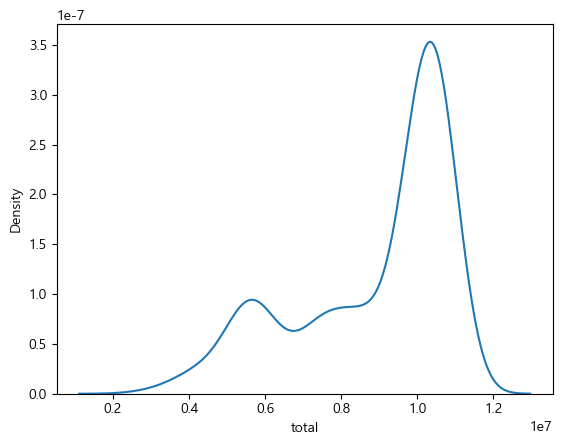

In [28]:
# 정규성 검정 - 승객 수
sns.kdeplot(data=passenger_and_weather["total"])
plt.show()


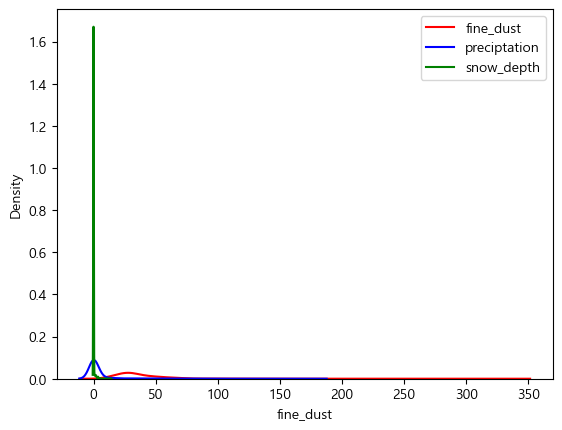

In [29]:
# 정규성 검정 - 미세먼지, 강수량, 적설량
sns.kdeplot(data=passenger_and_weather["fine_dust"], color='red', label="fine_dust")
sns.kdeplot(data=passenger_and_weather["precipitation"], color='blue', label="preciptation")
sns.kdeplot(data=passenger_and_weather["snow_depth"], color='green', label="snow_depth")
plt.legend()
plt.show()

그래프상 승객 수, 미세먼지, 강수량, 적설량 정규분포한다고 보기 어렵다고 판단

In [30]:
passenger_and_weather.columns

Index(['date', 'total', 'total_commute', 'total_other', 'fine_dust',
       'precipitation', 'snow_depth', 'fd_grade', 'p_grade', 's_grade', 'year',
       'season', 'holiday_or_weekend'],
      dtype='object')

In [31]:
# 평일 데이터 프레임
weekday_data = passenger_and_weather[passenger_and_weather['holiday_or_weekend'] == 0]
# 주말+공휴일 데이터 프레임
holiday_data = passenger_and_weather[passenger_and_weather['holiday_or_weekend'] == 1]

In [32]:
# 스피어만 상관계수
holiday_corr_spearman = holiday_data[['total', 'fine_dust']].corr(method='spearman')

# 켄달 상관계수
holiday_corr_kendall = holiday_data[['total', 'fine_dust']].corr(method='kendall')

In [33]:
# 전체 승객과 미세먼지의 상관관계
print( pearsonr( passenger_and_weather["total"], passenger_and_weather["fine_dust"] ) )
print( spearmanr( passenger_and_weather["total"], passenger_and_weather["fine_dust"] ) )
print( kendalltau( passenger_and_weather["total"], passenger_and_weather["fine_dust"] ), '\n' )

# 평일 승객과 미세먼지의 상관관계
print( pearsonr( weekday_data["total"], weekday_data["fine_dust"] ) )
print( spearmanr( weekday_data["total"], weekday_data["fine_dust"] ) )
print( kendalltau( weekday_data["total"], weekday_data["fine_dust"] ), '\n' )

# 주말 승객과 미세먼지의 상관관계
print( pearsonr( holiday_data["total"], holiday_data["fine_dust"] ) )
print( spearmanr( holiday_data["total"], holiday_data["fine_dust"] ) )
print( kendalltau( holiday_data["total"], holiday_data["fine_dust"] ), '\n' )

PearsonRResult(statistic=np.float64(0.015562919012068431), pvalue=np.float64(0.6202588135394289))
SignificanceResult(statistic=np.float64(0.022403018584132944), pvalue=np.float64(0.47565939925542144))
SignificanceResult(statistic=np.float64(0.01532317132208858), pvalue=np.float64(0.4686283341783034)) 

PearsonRResult(statistic=np.float64(0.011693780808815264), pvalue=np.float64(0.7599800291859525))
SignificanceResult(statistic=np.float64(-0.0013830473829629377), pvalue=np.float64(0.9711773288029892))
SignificanceResult(statistic=np.float64(-0.0010038732512437961), pvalue=np.float64(0.9689249614644186)) 

PearsonRResult(statistic=np.float64(-0.007121209985413317), pvalue=np.float64(0.8973018065529687))
SignificanceResult(statistic=np.float64(0.04373311408644573), pvalue=np.float64(0.4277639619923814))
SignificanceResult(statistic=np.float64(0.03179142272221472), pvalue=np.float64(0.39242697645662683)) 



C:\Users\human\AppData\Local\Temp\ipykernel_15180\2244480861.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


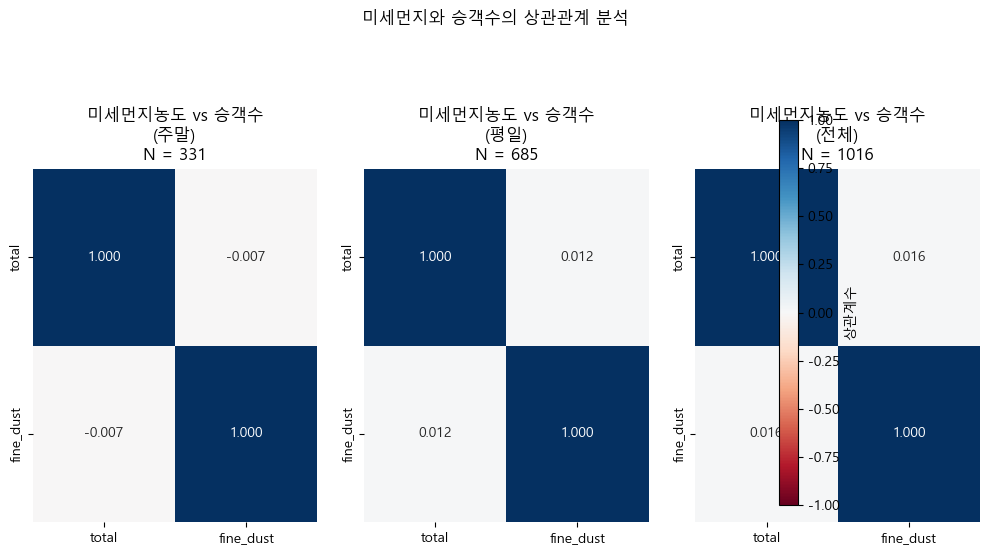

In [34]:
# 미세먼지와 승객의 상관관계 분석

def create_fine_dust_passenger_correlation(total_data, weekday_data, holiday_data):
    fine_dust_total = total_data
    fine_dust_weekday = weekday_data
    fine_dust_holiday = holiday_data
    
    # 그리드 설정
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    
    # 데이터셋 딕셔너리
    datasets = {
        '주말': fine_dust_holiday,
        '평일': fine_dust_weekday,
        '전체': fine_dust_total
    }
    
    # 각 데이터셋에 대해 히트맵 그리기
    for i, (data_name, data) in enumerate(datasets.items()):
        # 상관계수 행렬 계산
        corr = data[['total', 'fine_dust']].corr()
        
        # 히트맵 그리기
        sns.heatmap(corr, 
                   annot=True,
                   fmt='.3f',
                   cmap='RdBu',
                   vmin=-1, 
                   vmax=1,
                   center=0,
                   ax=axes[i],
                   cbar=False)
        
        # 제목 설정 (데이터 수 포함)
        axes[i].set_title(f'미세먼지농도 vs 승객수\n({data_name})\nN = {len(data)}')
    
    # 전체 타이틀
    plt.suptitle('미세먼지와 승객수의 상관관계 분석', fontsize=12, y=1.1)
    
    # 컬러바 추가
    fig.colorbar(axes[0].collections[0], ax=axes, location='right', label='상관계수')
    
    plt.tight_layout()
    return fig

# 히트맵 그리기
fig = create_fine_dust_passenger_correlation(
    total_data=passenger_and_weather,
    weekday_data=weekday_data,
    holiday_data=holiday_data
)

# 상세 상관계수 출력
datasets = {
    '전체': passenger_and_weather[passenger_and_weather['fine_dust'] > 0],
    '평일': weekday_data[weekday_data['fine_dust'] > 0],
    '주말': holiday_data[holiday_data['fine_dust'] > 0]
}


In [35]:
# # 전체 승객과 강수량의 상관관계
# print( pearsonr( passenger_and_weather["total"], passenger_and_weather["precipitation"] ) )
# print( spearmanr( passenger_and_weather["total"], passenger_and_weather["precipitation"] ) )
# print( kendalltau( passenger_and_weather["total"], passenger_and_weather["precipitation"] ), '\n' )

# # 평일 승객과 강수량의 상관관계
# print( pearsonr( weekday_data["total"], weekday_data["precipitation"] ) )
# print( spearmanr( weekday_data["total"], weekday_data["precipitation"] ) )
# print( kendalltau( weekday_data["total"], weekday_data["precipitation"] ), '\n' )

# # 주말 승객과 강수량의 상관관계
# print( pearsonr( holiday_data["total"], holiday_data["precipitation"] ) )
# print( spearmanr( holiday_data["total"], holiday_data["precipitation"] ) )
# print( kendalltau( holiday_data["total"], holiday_data["precipitation"] ), '\n' )

In [36]:
# 강수량이 0이 아닌 날의 데이터만 추출
rainy_data = passenger_and_weather[passenger_and_weather['precipitation'] > 0]

# 평일 중 강수일 데이터
rainy_weekday = weekday_data[weekday_data['precipitation'] > 0]

# 주말/휴일 중 강수일 데이터
rainy_holiday = holiday_data[holiday_data['precipitation'] > 0]

# 강수일의 승객수와 강수량의 상관관계 분석
print("강수일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(rainy_data["total"], rainy_data["precipitation"]))
print("Spearman:", spearmanr(rainy_data["total"], rainy_data["precipitation"]))
print("Kendall:", kendalltau(rainy_data["total"], rainy_data["precipitation"]))

# 참고로 데이터 수도 확인해보면 좋습니다
print("\n전체 데이터 수:", len(passenger_and_weather))
print("강수일 데이터 수:", len(rainy_data))

print("\n평일 강수일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(rainy_weekday["total"], rainy_weekday["precipitation"]))
print("Spearman:", spearmanr(rainy_weekday["total"], rainy_weekday["precipitation"]))
print("Kendall:", kendalltau(rainy_weekday["total"], rainy_weekday["precipitation"]))

print("\n주말/휴일 강수일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(rainy_holiday["total"], rainy_holiday["precipitation"]))
print("Spearman:", spearmanr(rainy_holiday["total"], rainy_holiday["precipitation"]))
print("Kendall:", kendalltau(rainy_holiday["total"], rainy_holiday["precipitation"]))

print("\n평일 강수일 데이터 수:", len(rainy_weekday))
print("주말/휴일 강수일 데이터 수:", len(rainy_holiday))


강수일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(-0.01436365478414767), pvalue=np.float64(0.8030358943180167))
Spearman: SignificanceResult(statistic=np.float64(-0.11062890386126736), pvalue=np.float64(0.053997960818875666))
Kendall: SignificanceResult(statistic=np.float64(-0.07510826937031863), pvalue=np.float64(0.051987065280627666))

전체 데이터 수: 1016
강수일 데이터 수: 304

평일 강수일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(-0.31715424900663974), pvalue=np.float64(5.013714770973738e-06))
Spearman: SignificanceResult(statistic=np.float64(-0.20941122481213179), pvalue=np.float64(0.0029927311266397224))
Kendall: SignificanceResult(statistic=np.float64(-0.14813864454685316), pvalue=np.float64(0.0019847486575513633))

주말/휴일 강수일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(-0.09788495685281882), pvalue=np.float64(0.32051323926531505))
Spearman: SignificanceResult(statistic=np.float64(-0.06351305433512532), pvalue=np.float64(0.5197862589025302))
Kenda

C:\Users\human\AppData\Local\Temp\ipykernel_15180\1062901762.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



강수일 데이터 분석 결과:

전체 (데이터 수: 304):
Pearson: -0.014
Spearman: -0.111
Kendall: -0.075

평일 (데이터 수: 199):
Pearson: -0.317
Spearman: -0.209
Kendall: -0.148

주말 (데이터 수: 105):
Pearson: -0.098
Spearman: -0.064
Kendall: -0.040


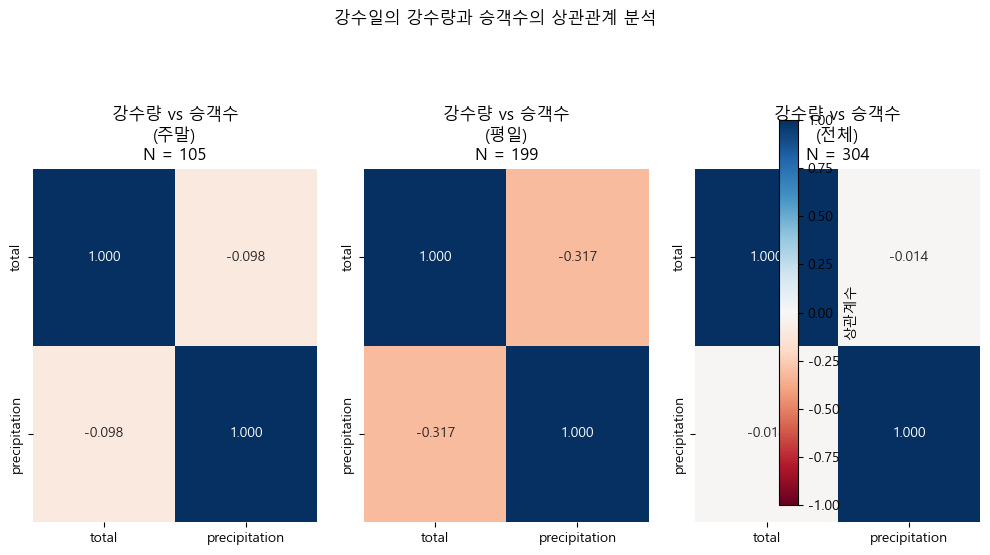

In [37]:
# 강수량과 승객의 상관관계 분석

def create_rain_passenger_correlation(total_data, weekday_data, holiday_data):
    # 강수일 데이터만 필터링
    rainy_total = total_data[total_data['precipitation'] > 0]
    rainy_weekday = weekday_data[weekday_data['precipitation'] > 0]
    rainy_holiday = holiday_data[holiday_data['precipitation'] > 0]
    
    # 그리드 설정
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    
    # 데이터셋 딕셔너리
    datasets = {
        '주말': rainy_holiday,
        '평일': rainy_weekday,
        '전체': rainy_total
    }
    
    # 각 데이터셋에 대해 히트맵 그리기
    for i, (data_name, data) in enumerate(datasets.items()):
        # 상관계수 행렬 계산
        corr = data[['total', 'precipitation']].corr()
        
        # 히트맵 그리기
        sns.heatmap(corr, 
                   annot=True,
                   fmt='.3f',
                   cmap='RdBu',
                   vmin=-1, 
                   vmax=1,
                   center=0,
                   ax=axes[i],
                   cbar=False)
        
        # 제목 설정 (데이터 수 포함)
        axes[i].set_title(f'강수량 vs 승객수\n({data_name})\nN = {len(data)}')
    
    # 전체 타이틀
    plt.suptitle('강수일의 강수량과 승객수의 상관관계 분석', fontsize=12, y=1.1)
    
    # 컬러바 추가
    fig.colorbar(axes[0].collections[0], ax=axes, location='right', label='상관계수')
    
    plt.tight_layout()
    return fig

# 히트맵 그리기
fig = create_rain_passenger_correlation(
    total_data=passenger_and_weather,
    weekday_data=weekday_data,
    holiday_data=holiday_data
)

# 상세 상관계수 출력
datasets = {
    '전체': passenger_and_weather[passenger_and_weather['precipitation'] > 0],
    '평일': weekday_data[weekday_data['precipitation'] > 0],
    '주말': holiday_data[holiday_data['precipitation'] > 0]
}

print("\n강수일 데이터 분석 결과:")
for name, data in datasets.items():
    print(f"\n{name} (데이터 수: {len(data)}):")
    print(f"Pearson: {data[['total', 'precipitation']].corr().iloc[0,1]:.3f}")
    print(f"Spearman: {data[['total', 'precipitation']].corr(method='spearman').iloc[0,1]:.3f}")
    print(f"Kendall: {data[['total', 'precipitation']].corr(method='kendall').iloc[0,1]:.3f}")

In [38]:
# 적설량이 0이 아닌 날의 데이터만 추출
snowy_data = passenger_and_weather[passenger_and_weather['snow_depth'] > 0]

# 평일 중 적설일 데이터
snowy_weekday = weekday_data[weekday_data['snow_depth'] > 0]

# 주말/휴일 중 적설일 데이터
snowy_holiday = holiday_data[holiday_data['snow_depth'] > 0]

# 적설일의 승객수와 강수량의 상관관계 분석
print("적설일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(snowy_data["total"], snowy_data["snow_depth"]))
print("Spearman:", spearmanr(snowy_data["total"], snowy_data["snow_depth"]))
print("Kendall:", kendalltau(snowy_data["total"], snowy_data["snow_depth"]))

# 참고로 데이터 수도 확인해보면 좋습니다
print("\n전체 데이터 수:", len(passenger_and_weather))
print("적설일 데이터 수:", len(snowy_data))

print("\n평일 적설일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(snowy_weekday["total"], snowy_weekday["snow_depth"]))
print("Spearman:", spearmanr(snowy_weekday["total"], snowy_weekday["snow_depth"]))
print("Kendall:", kendalltau(snowy_weekday["total"], snowy_weekday["snow_depth"]))

print("\n주말/휴일 적설일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(snowy_holiday["total"], snowy_holiday["snow_depth"]))
print("Spearman:", spearmanr(snowy_holiday["total"], snowy_holiday["snow_depth"]))
print("Kendall:", kendalltau(snowy_holiday["total"], snowy_holiday["snow_depth"]))

print("\n평일 적설일 데이터 수:", len(snowy_weekday))
print("주말/휴일 적설일 데이터 수:", len(snowy_holiday))


적설일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(0.06391309339777962), pvalue=np.float64(0.6216483271883438))
Spearman: SignificanceResult(statistic=np.float64(0.17728222300435625), pvalue=np.float64(0.16806137740137084))
Kendall: SignificanceResult(statistic=np.float64(0.13358993947177028), pvalue=np.float64(0.1285232653555727))

전체 데이터 수: 1016
적설일 데이터 수: 62

평일 적설일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(0.39266835452165255), pvalue=np.float64(0.013411658634755566))
Spearman: SignificanceResult(statistic=np.float64(0.3669790879167818), pvalue=np.float64(0.021558881599490248))
Kendall: SignificanceResult(statistic=np.float64(0.2614125509186912), pvalue=np.float64(0.02006986722344122))

주말/휴일 적설일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(0.02874947429111401), pvalue=np.float64(0.8963962203575655))
Spearman: SignificanceResult(statistic=np.float64(0.009891201673385095), pvalue=np.float64(0.964273044883843))
Kendall: SignificanceRes

C:\Users\human\AppData\Local\Temp\ipykernel_15180\700285059.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



적설일 데이터 분석 결과:

전체 (데이터 수: 62):
Pearson: 0.064
Spearman: 0.177
Kendall: 0.134

평일 (데이터 수: 39):
Pearson: 0.393
Spearman: 0.367
Kendall: 0.261

주말 (데이터 수: 23):
Pearson: 0.029
Spearman: 0.010
Kendall: 0.020


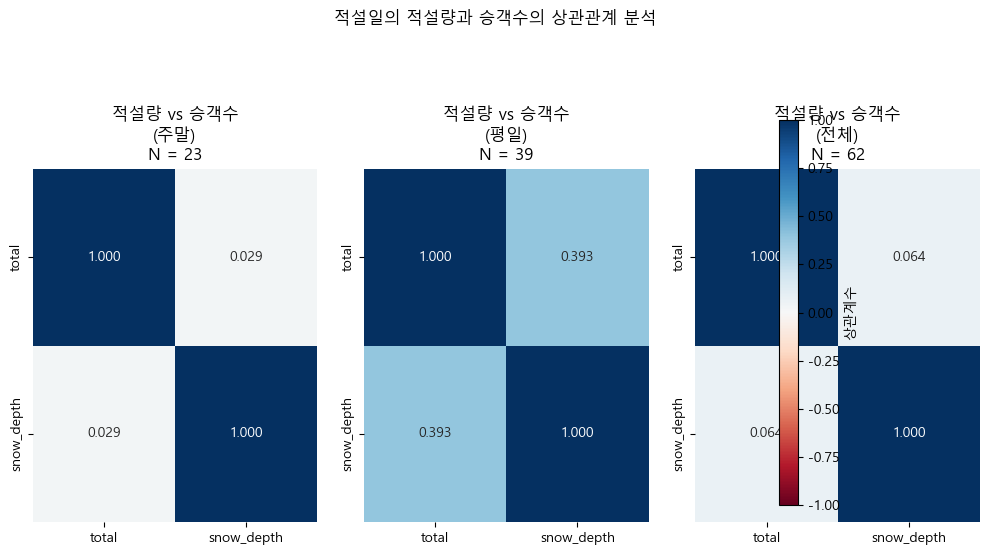

In [39]:
# 적설량과 승객의 상관관계 분석

def create_snow_passenger_correlation(total_data, weekday_data, holiday_data):
    # 적설일 데이터만 필터링
    snowy_total = total_data[total_data['snow_depth'] > 0]
    snowy_weekday = weekday_data[weekday_data['snow_depth'] > 0]
    snowy_holiday = holiday_data[holiday_data['snow_depth'] > 0]
    
    # 그리드 설정
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    
    # 데이터셋 딕셔너리
    datasets = {
        '주말': snowy_holiday,
        '평일': snowy_weekday,
        '전체': snowy_total
    }
    
    # 각 데이터셋에 대해 히트맵 그리기
    for i, (data_name, data) in enumerate(datasets.items()):
        # 상관계수 행렬 계산
        corr = data[['total', 'snow_depth']].corr()
        
        # 히트맵 그리기
        sns.heatmap(corr, 
                   annot=True,
                   fmt='.3f',
                   cmap='RdBu',
                   vmin=-1, 
                   vmax=1,
                   center=0,
                   ax=axes[i],
                   cbar=False)
        
        # 제목 설정 (데이터 수 포함)
        axes[i].set_title(f'적설량 vs 승객수\n({data_name})\nN = {len(data)}')
    
    # 전체 타이틀
    plt.suptitle('적설일의 적설량과 승객수의 상관관계 분석', fontsize=12, y=1.1)
    
    # 컬러바 추가
    fig.colorbar(axes[0].collections[0], ax=axes, location='right', label='상관계수')
    
    plt.tight_layout()
    return fig

# 히트맵 그리기
fig = create_snow_passenger_correlation(
    total_data=passenger_and_weather,
    weekday_data=weekday_data,
    holiday_data=holiday_data
)

# 상세 상관계수 출력
datasets = {
    '전체': passenger_and_weather[passenger_and_weather['snow_depth'] > 0],
    '평일': weekday_data[weekday_data['snow_depth'] > 0],
    '주말': holiday_data[holiday_data['snow_depth'] > 0]
}

print("\n적설일 데이터 분석 결과:")
for name, data in datasets.items():
    print(f"\n{name} (데이터 수: {len(data)}):")
    print(f"Pearson: {data[['total', 'snow_depth']].corr().iloc[0,1]:.3f}")
    print(f"Spearman: {data[['total', 'snow_depth']].corr(method='spearman').iloc[0,1]:.3f}")
    print(f"Kendall: {data[['total', 'snow_depth']].corr(method='kendall').iloc[0,1]:.3f}")

C:\Users\human\AppData\Local\Temp\ipykernel_15180\3433568525.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



상관계수 요약:

fine_dust와의 상관계수:
전체: 0.016
평일: 0.012
주말: -0.007

precipitation와의 상관계수:
전체: -0.025
평일: -0.153
주말: -0.064

snow_depth와의 상관계수:
전체: -0.028
평일: 0.000
주말: -0.056


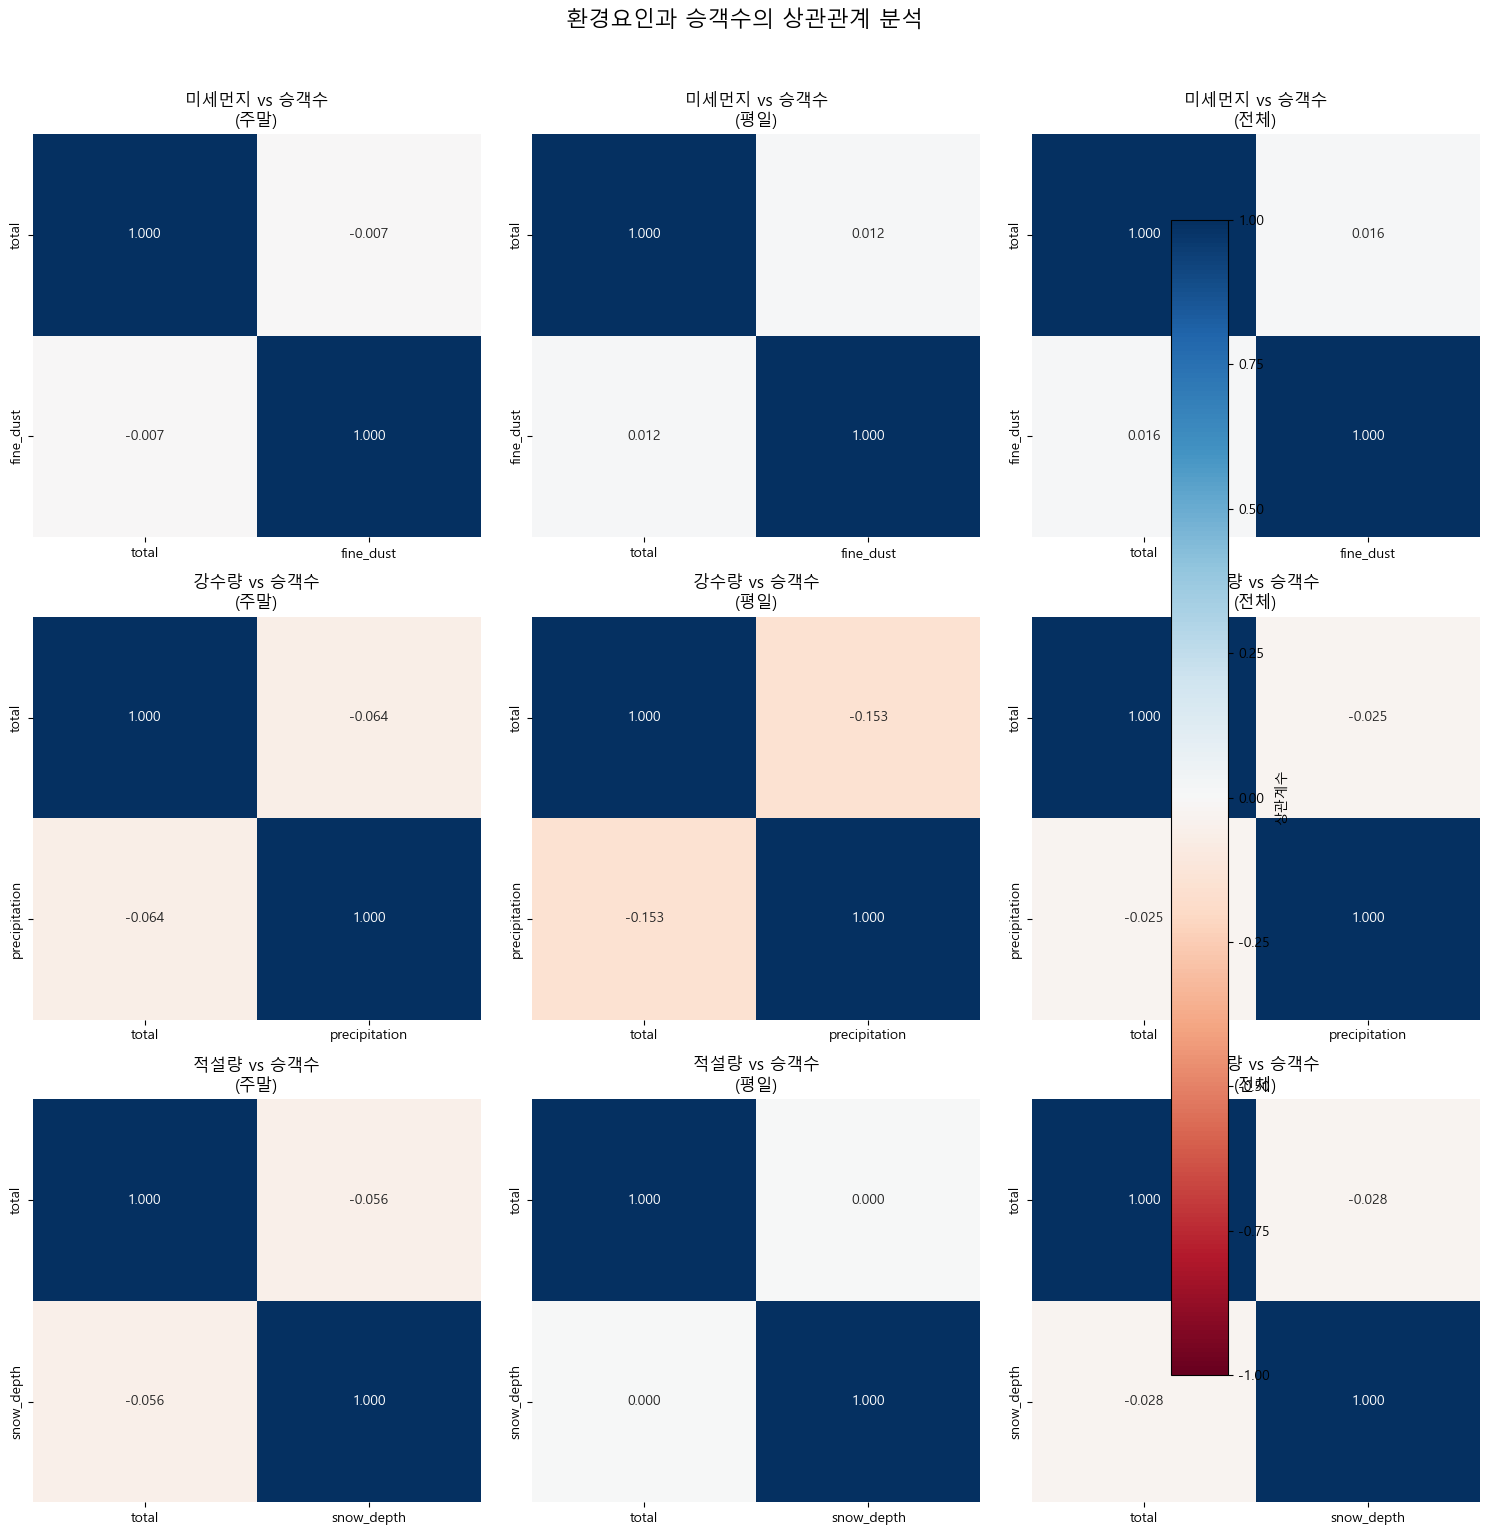

In [40]:


def create_correlation_grid(total_data, weekday_data, holiday_data):
    # 그리드 설정
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    # 분석할 환경변수들
    env_vars = ['fine_dust', 'precipitation', 'snow_depth']
    titles = ['미세먼지', '강수량', '적설량']
    
    # 데이터셋 딕셔너리
    datasets = {
        '주말': holiday_data,
        '평일': weekday_data,
        '전체': total_data
    }
    
    # 각 행(환경변수)에 대해
    for i, (env_var, title) in enumerate(zip(env_vars, titles)):
        # 각 열(데이터셋)에 대해
        for j, (data_name, data) in enumerate(datasets.items()):
            # 상관계수 행렬 계산
            corr = data[['total', env_var]].corr()
            
            # 히트맵 그리기
            sns.heatmap(corr, 
                       annot=True,
                       fmt='.3f',
                       cmap='RdBu',
                       vmin=-1, 
                       vmax=1,
                       center=0,
                       ax=axes[i][j],
                       cbar=False)  # 각각의 컬러바는 생략
            
            # 제목 설정
            axes[i][j].set_title(f'{title} vs 승객수\n({data_name})')
    
    # 전체 타이틀
    plt.suptitle('환경요인과 승객수의 상관관계 분석', fontsize=16, y=1.02)
    
    # 컬러바 추가 (하나로 통일)
    fig.colorbar(axes[0][0].collections[0], ax=axes, location='right', label='상관계수')
    
    plt.tight_layout()
    return fig

# 히트맵 그리기
fig = create_correlation_grid(
    total_data=passenger_and_weather,
    weekday_data=weekday_data,
    holiday_data=holiday_data
)

# 각 상관계수 출력
env_vars = ['fine_dust', 'precipitation', 'snow_depth']
datasets = {
    '전체': passenger_and_weather,
    '평일': weekday_data,
    '주말': holiday_data
}

print("\n상관계수 요약:")
for env_var in env_vars:
    print(f"\n{env_var}와의 상관계수:")
    for name, data in datasets.items():
        corr = data[['total', env_var]].corr().iloc[0,1]
        print(f"{name}: {corr:.3f}")

In [41]:
passenger_and_weather["total_other"].min(), passenger_and_weather["total"].max()
#  1,500,000
# 15,000,000

(np.float64(1869750.0), np.float64(11437233.0))

C:\Users\human\AppData\Local\Temp\ipykernel_15180\22735613.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


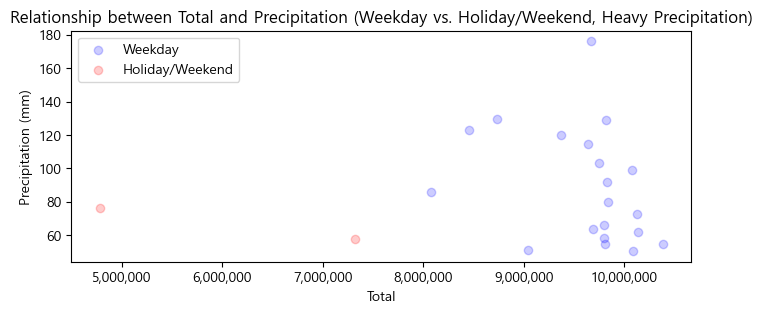

In [42]:
# 강수량은 대강수, 전체 승객 수

# 강수량이 대강수 이상 데이터만 필터링
Heavy_rain_df = passenger_and_weather[passenger_and_weather['precipitation'] > 50]

# 그룹화된 산점도 그리기
plt.figure(figsize=(8, 3))

# holiday_or_weekend가 0인 경우
plt.scatter(Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 0]['total'],
            Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 0]['precipitation'],
            alpha=0.2, color='b', label='Weekday')

# holiday_or_weekend가 1인 경우
plt.scatter(Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 1]['total'],
            Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 1]['precipitation'],
            alpha=0.2, color='r', label='Holiday/Weekend')

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Relationship between Total and Precipitation (Weekday vs. Holiday/Weekend, Heavy Precipitation)')
plt.xlabel('Total')
plt.ylabel('Precipitation (mm)')
# plt.xlim(1850000.0, 11500000.0)
plt.legend()
plt.show()

C:\Users\human\AppData\Local\Temp\ipykernel_15180\3390321828.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


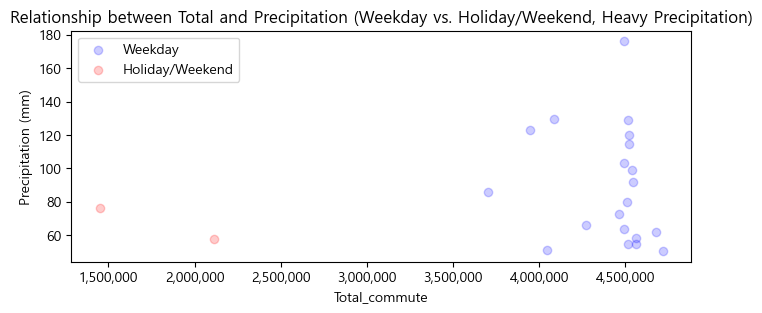

In [43]:
# 강수량은 대강수, 통근시간 승객 수

# 강수량이 대강수 이상 데이터만 필터링
Heavy_rain_df = passenger_and_weather[passenger_and_weather['precipitation'] > 50]

# 그룹화된 산점도 그리기
plt.figure(figsize=(8, 3))

# holiday_or_weekend가 0인 경우
plt.scatter(Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 0]['total_commute'],
            Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 0]['precipitation'],
            alpha=0.2, color='b', label='Weekday')

# holiday_or_weekend가 1인 경우
plt.scatter(Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 1]['total_commute'],
            Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 1]['precipitation'],
            alpha=0.2, color='r', label='Holiday/Weekend')

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Relationship between Total and Precipitation (Weekday vs. Holiday/Weekend, Heavy Precipitation)')
plt.xlabel('Total_commute')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

C:\Users\human\AppData\Local\Temp\ipykernel_15180\10384835.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


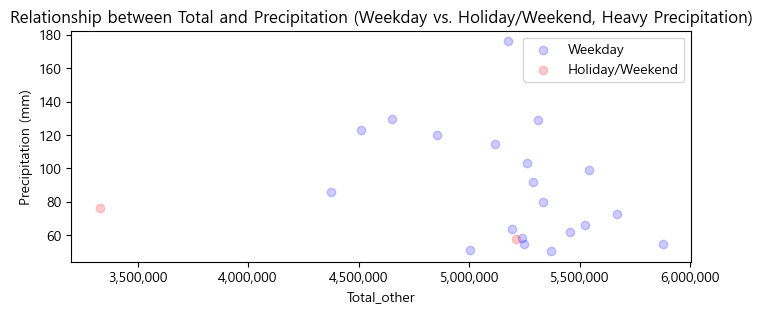

In [44]:
# 강수량은 대강수, 통근시간 아닐때 승객 수

# 강수량이 대강수 이상 데이터만 필터링
Heavy_rain_df = passenger_and_weather[passenger_and_weather['precipitation'] > 50]

# 그룹화된 산점도 그리기
plt.figure(figsize=(8, 3))

# holiday_or_weekend가 0인 경우
plt.scatter(Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 0]['total_other'],
            Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 0]['precipitation'],
            alpha=0.2, color='b', label='Weekday')

# holiday_or_weekend가 1인 경우

plt.scatter(Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 1]['total_other'],
            Heavy_rain_df[Heavy_rain_df['holiday_or_weekend'] == 1]['precipitation'],
            alpha=0.2, color='r', label='Holiday/Weekend')

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Relationship between Total and Precipitation (Weekday vs. Holiday/Weekend, Heavy Precipitation)')
plt.xlabel('Total_other')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [45]:
passenger_and_weather.columns

Index(['date', 'total', 'total_commute', 'total_other', 'fine_dust',
       'precipitation', 'snow_depth', 'fd_grade', 'p_grade', 's_grade', 'year',
       'season', 'holiday_or_weekend'],
      dtype='object')

In [46]:

# 범주화 - 계절/미세먼지등급/강수량등급/적설량등급
# 순서있는 범주형 : ordered = True, 순서 없는 범주형 : ordered = False
c_season = ["Spring", "Summer", "Fall", "Winter"]
c_season1 = CategoricalDtype(categories = c_season, ordered = True)

c_fd_grade = ['Good', 'Normal', 'Bad', 'Very_bad']
c_fd_grade1 = CategoricalDtype(categories = c_fd_grade, ordered = True)

c_p_grade = ['Dry', 'Light', 'Moderate', 'Heavy']
c_p_grade1 = CategoricalDtype(categories = c_p_grade, ordered = True)

c_s_grade = ['No_Snow', 'Light_Snow', 'Moderate_Snow', 'Heavy_Snow']
c_s_grade1 = CategoricalDtype(categories = c_s_grade, ordered = True)

passenger_and_weather["season"] = passenger_and_weather["season"].astype(c_season1)
passenger_and_weather["fd_grade"] = passenger_and_weather["fd_grade"].astype(c_fd_grade1)
passenger_and_weather["p_grade"] = passenger_and_weather["p_grade"].astype(c_p_grade1)
passenger_and_weather["s_grade"] = passenger_and_weather["s_grade"].astype(c_s_grade1)

passenger_and_weather.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 365 to 1398
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1016 non-null   datetime64[ns]
 1   total               1016 non-null   float64       
 2   total_commute       1016 non-null   float64       
 3   total_other         1016 non-null   float64       
 4   fine_dust           1016 non-null   float64       
 5   precipitation       1016 non-null   float64       
 6   snow_depth          1016 non-null   float64       
 7   fd_grade            1016 non-null   category      
 8   p_grade             1016 non-null   category      
 9   s_grade             1016 non-null   category      
 10  year                1016 non-null   int64         
 11  season              1016 non-null   category      
 12  holiday_or_weekend  1016 non-null   float64       
dtypes: category(4), datetime64[ns](1), float64(7), int6

In [47]:
# 계절과 미세먼지의 카이제곱 검정

# 교차표 생성
cross_table = pd.crosstab(passenger_and_weather['season'], 
                         passenger_and_weather['fd_grade'])

# 카이제곱 검정 수행
chi2, p_value, dof, expected = chi2_contingency(cross_table)

print("교차표:")
print(cross_table)
print("\n카이제곱 검정 결과:")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"자유도: {dof}")

교차표:
fd_grade  Good  Normal  Bad  Very_bad
season                               
Spring      51     190   22         6
Summer     200      72    0         0
Fall       167      71    1         0
Winter      69     158    8         1

카이제곱 검정 결과:
카이제곱 통계량: 264.20
p-value: 0.0000
자유도: 9


In [48]:
# # 해석

# 교차표 분석:
# 봄(Spring)은 Normal(190회)이 가장 많고, Bad(22회)와 Very_bad(6회)도 다른 계절에 비해 상대적으로 많이 발생
# 여름(Summer)은 Good(200회)이 압도적으로 많고, Bad와 Very_bad가 전혀 없음
# 가을(Fall)도 여름과 비슷하게 Good(167회)이 많고 공기질이 대체로 좋음
# 겨울(Winter)은 봄과 비슷하게 Normal(158회)이 가장 많음

# 카이제곱 검정 결과 해석:
# p-value가 0.0000으로, 유의수준 0.05보다 매우 작음
# 따라서 "계절과 미세먼지 등급은 서로 독립적이다"라는 귀무가설을 기각
# 즉, 계절과 미세먼지 등급 사이에는 통계적으로 유의한 관련성이 있음

# 실질적 의미:
# 계절에 따라 미세먼지 등급의 분포가 뚜렷하게 다름
# 여름과 가을은 대체로 공기질이 좋음
# 봄과 겨울은 상대적으로 공기질이 나쁜 날이 많음
# 특히 봄에는 미세먼지가 'Bad'나 'Very_bad'인 날이 다른 계절보다 많이 발생

In [49]:
# 계절과 강수량의 카이제곱 검정

# 교차표 생성
cross_table = pd.crosstab(passenger_and_weather['season'], 
                         passenger_and_weather['p_grade'])

# 카이제곱 검정 수행
chi2, p_value, dof, expected = chi2_contingency(cross_table)

print("교차표:")
print(cross_table)
print("\n카이제곱 검정 결과:")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"자유도: {dof}")

교차표:
p_grade  Dry  Light  Moderate  Heavy
season                              
Spring   209     44        15      1
Summer   145     69        41     17
Fall     181     36        18      4
Winter   177     51         8      0

카이제곱 검정 결과:
카이제곱 통계량: 79.49
p-value: 0.0000
자유도: 9


In [50]:
# 강수량(p_grade) 분석:
# 교차표가 보여주는 실제 현상:

# 봄: 269일 중
# 건조(Dry): 209일 (77.7%)
# 약한 비(Light): 44일 (16.4%)
# 보통 비(Moderate): 15일 (5.6%)
# 강한 비(Heavy): 1일 (0.3%)
# → 대부분 비가 오지 않거나 약한 비가 주를 이룸

# 여름: 272일 중
# 건조(Dry): 145일 (53.3%)
# 약한 비(Light): 69일 (25.4%)
# 보통 비(Moderate): 41일 (15.1%)
# 강한 비(Heavy): 17일 (6.2%)
# → 다른 계절에 비해 강한 비와 보통 비가 많이 발생

# 가을: 239일 중
# 건조(Dry): 181일 (75.7%)
# 약한 비(Light): 36일 (15.1%)
# 보통 비(Moderate): 18일 (7.5%)
# 강한 비(Heavy): 4일 (1.7%)
# → 봄과 비슷하게 대체로 건조

# 겨울: 236일 중
# 건조(Dry): 177일 (75%)
# 약한 비(Light): 51일 (21.6%)
# 보통 비(Moderate): 8일 (3.4%)
# 강한 비(Heavy): 0일 (0%)
# → 강한 비는 전혀 없고, 대부분 건조하거나 약한 비


# 통계적 의미:
# 카이제곱 통계량(79.49)이 크고 p-value(0.0000)가 매우 작다는 것은
# "계절에 따라 강수량 패턴이 다르다"는 것을 통계적으로 증명
# 특히 여름철은 다른 계절과 확연히 다른 강수 패턴을 보임

# 실무적 의미:
# 강수량 대비:
# 여름철(6-8월): 강한 비와 보통 비가 빈번하므로 배수 시설 점검, 우천 시 대책 중점 필요
# 다른 계절: 상대적으로 가벼운 강수 대비만 필요


In [51]:
# 계절과 적설량의 카이제곱 검정

# 교차표 생성
cross_table = pd.crosstab(passenger_and_weather['season'], 
                         passenger_and_weather['s_grade'])

# 카이제곱 검정 수행
chi2, p_value, dof, expected = chi2_contingency(cross_table)

print("교차표:")
print(cross_table)
print("\n카이제곱 검정 결과:")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"자유도: {dof}")

교차표:
s_grade  No_Snow  Light_Snow  Moderate_Snow  Heavy_Snow
season                                                 
Spring       268           1              0           0
Summer       272           0              0           0
Fall         239           0              0           0
Winter       175          37             21           3

카이제곱 검정 결과:
카이제곱 통계량: 209.28
p-value: 0.0000
자유도: 9


In [52]:
# 적설량(s_grade) 분석:
# 교차표가 보여주는 실제 현상:
# 봄: 269일 중
# 눈 없음(No_Snow): 268일 (99.6%)
# 약한 눈(Light_Snow): 1일 (0.4%)
# 나머지 등급: 0일
# → 사실상 눈이 거의 없음

# 여름: 272일 중
# 눈 없음(No_Snow): 272일 (100%)
# 나머지 등급: 0일
# → 눈이 전혀 없음

# 가을: 239일 중
# 눈 없음(No_Snow): 239일 (100%)
# 나머지 등급: 0일
# → 눈이 전혀 없음

# 겨울: 236일 중
# 눈 없음(No_Snow): 175일 (74.2%)
# 약한 눈(Light_Snow): 37일 (15.7%)
# 보통 눈(Moderate_Snow): 21일 (8.9%)
# 강한 눈(Heavy_Snow): 3일 (1.2%)
# → 유일하게 다양한 적설량 발생

# 통계적 의미:
# 카이제곱 통계량(209.28)이 매우 크고 p-value(0.0000)가 매우 작다는 것은
# "겨울철과 다른 계절 사이에 적설량 패턴이 확연히 다르다"는 것을 의미
# 특히 겨울철에만 눈이 집중되는 뚜렷한 계절성이 통계적으로 입증됨

# 실무적 의미:
# 적설량 대비:
# 겨울철(12-2월): 제설 장비와 인력 집중 배치 필요
# 다른 계절: 적설 대비가 거의 필요 없음

# 이러한 분석은 계절별 대중교통 운영 계획을 수립할 때 매우 중요한 기초 자료가 될 수 있습니다.

In [53]:
# 비통근승객과 계절/강수량/적설량의 카이제곱 검정 - 강수량 적설량 0 포함

# 승객 데이터 범주화 및 교차표 생성 함수
def create_contingency_tables(df, category_col):
    """
    데이터프레임에서 승객 데이터를 범주화하고 교차표 생성
    
    Args:
        df: 분석할 데이터프레임
        category_col: 분석할 범주형 컬럼명 (예: 'season' 또는 'p_grade')
    """
    # 비통근 승객 수를 3분위수로 범주화
    df['other_category'] = pd.qcut(df['total_other'], q=3, labels=['Low', 'Medium', 'High'])
    
    # 평일/주말 데이터 분리
    weekday_data = df[df['holiday_or_weekend'] == 0]
    weekend_data = df[df['holiday_or_weekend'] == 1]
    
    # 교차표 생성
    weekday_contingency = pd.crosstab(weekday_data[category_col], weekday_data['other_category'])
    weekend_contingency = pd.crosstab(weekend_data[category_col], weekend_data['other_category'])
    
    return weekday_contingency, weekend_contingency

# 카이제곱 검정 및 결과 출력 함수
def perform_chi2_test(weekday_contingency, weekend_contingency, category_name):
    """
    교차표에 대해 카이제곱 검정을 수행하고 결과 출력
    
    Args:
        weekday_contingency: 평일 교차표
        weekend_contingency: 주말 교차표
        category_name: 분석 중인 범주의 이름 (예: '계절' 또는 '강수량')
    """
    # 평일 분석
    weekday_chi2, weekday_p, weekday_dof, weekday_expected = chi2_contingency(weekday_contingency)
    
    # 주말 분석
    weekend_chi2, weekend_p, weekend_dof, weekend_expected = chi2_contingency(weekend_contingency)
    
    print(f"=== 평일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekday_contingency)
    print(f"\n카이제곱 통계량: {weekday_chi2:.2f}")
    print(f"p-value: {weekday_p:.4f}")
    
    print(f"\n=== 주말/공휴일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekend_contingency)
    print(f"\n카이제곱 통계량: {weekend_chi2:.2f}")
    print(f"p-value: {weekend_p:.4f}")

# 실행 코드 - 계절 분석
weekday_season_cont, weekend_season_cont = create_contingency_tables(passenger_and_weather, 'season')
perform_chi2_test(weekday_season_cont, weekend_season_cont, '계절')

# 실행 코드 - 강수량 분석
weekday_precip_cont, weekend_precip_cont = create_contingency_tables(passenger_and_weather, 'p_grade')
perform_chi2_test(weekday_precip_cont, weekend_precip_cont, '강수량')

# 실행 코드 - 적설량 분석
weekday_precip_cont, weekend_precip_cont = create_contingency_tables(passenger_and_weather, 's_grade')
perform_chi2_test(weekday_precip_cont, weekend_precip_cont, '적설량')


=== 평일 계절 분석 ===

교차표:
other_category  Low  Medium  High
season                           
Spring           32      52    99
Summer           17     102    69
Fall              1      53   102
Winter           50      63    45

카이제곱 통계량: 104.03
p-value: 0.0000

=== 주말/공휴일 계절 분석 ===

교차표:
other_category  Low  Medium  High
season                           
Spring           61      13    12
Summer           61      22     1
Fall             51      22    10
Winter           66      11     1

카이제곱 통계량: 24.61
p-value: 0.0004
=== 평일 강수량 분석 ===

교차표:
other_category  Low  Medium  High
p_grade                          
Dry              69     176   241
Light            18      56    59
Moderate          5      27    14
Heavy             8      11     1

카이제곱 통계량: 27.69
p-value: 0.0001

=== 주말/공휴일 강수량 분석 ===

교차표:
other_category  Low  Medium  High
p_grade                          
Dry             157      48    21
Light            52      12     3
Moderate         29       7     0
Heavy         

In [54]:
# 비통근승객과 계절/강수량/적설량의 카이제곱 검정 - 강수량 적설량 0 포함

# 1. 계절별 분석:
# - 평일 (p-value < 0.001, χ² = 104.03):
#   * 매우 강한 통계적 연관성이 있습니다
#   * 봄과 가을은 High 승객수가 많음 (각각 99회, 102회)
#   * 여름은 Medium이 지배적 (102회)
#   * 겨울은 Low와 Medium이 많음 (각각 50회, 63회)

# - 주말/공휴일 (p-value = 0.0004, χ² = 24.61):
#   * 유의한 통계적 연관성이 있으나, 평일보다는 약함
#   * 모든 계절에서 Low 승객수가 지배적
#   * 특히 겨울(66회)과 봄/여름(각 61회)에 Low가 많음

# 2. 강수량별 분석:
# - 평일 (p-value = 0.0001, χ² = 27.69):
#   * 유의한 통계적 연관성이 있음
#   * 맑은 날(Dry)은 High 승객수가 많음 (241회)
#   * 강수량이 증가할수록 전반적으로 승객수가 감소하는 경향
#   * Heavy rain에서는 특히 High 승객수가 매우 적음 (1회)

# - 주말/공휴일 (p-value = 0.3302, χ² = 6.90):
#   * 통계적으로 유의한 연관성이 없음
#   * 강수량과 관계없이 대부분 Low 승객수를 보임
#   * 주말/공휴일에는 날씨가 승객수에 큰 영향을 미치지 않음

# 3. 적설량별 분석:
# - 평일 (p-value = 0.1645, χ² = 9.16):
#   * 통계적으로 유의한 연관성이 없음
#   * 대부분의 날이 No_Snow에 집중됨
#   * 눈이 오는 날이 적어 패턴을 찾기 어려움

# - 주말/공휴일 (p-value = 0.8272, χ² = 2.85):
#   * 통계적으로 유의한 연관성이 없음
#   * 적설량에 관계없이 Low 승객수가 지배적
#   * 데이터가 No_Snow에 크게 치우쳐 있음

# 종합적 결론:
# 1. 비통근 승객수는 계절과 가장 강한 연관성을 보입니다 (특히 평일).
# 2. 강수량은 평일 승객수에만 유의한 영향을 미칩니다.
# 3. 적설량은 통계적으로 유의한 영향을 미치지 않습니다 (데이터 편중 가능성).
# 4. 주말/공휴일은 전반적으로 날씨나 계절의 영향을 덜 받으며, Low 승객수가 지배적입니다.

# 이러한 패턴은 평일의 비통근 통행이 계절과 강수량의 영향을 많이 받는 반면, 
# 주말/공휴일의 통행은 이러한 외부 요인의 영향을 덜 받는다는 것을 시사합니다.

In [55]:
# 비통근승객과 계절/강수량/적설량의 카이제곱 검정 - 강수량 적설량 0 미포함

import pandas as pd
from scipy.stats import chi2_contingency

# 승객 데이터 범주화 및 교차표 생성 함수
def create_contingency_tables(df, category_col, filter_non_zero=False):
    """
    데이터프레임에서 승객 데이터를 범주화하고 교차표 생성
    
    Args:
        df: 분석할 데이터프레임
        category_col: 분석할 범주형 컬럼명 (예: 'season', 'p_grade', 's_grade')
        filter_non_zero: True인 경우, 해당 범주 컬럼에서 0이 아닌 값만 필터링
    """
    # 비통근 승객 수를 3분위수로 범주화
    df['other_category'] = pd.qcut(df['total_other'], q=3, labels=['Low', 'Medium', 'High'])
    
    # 선택적으로 0이 아닌 값만 필터링
    if filter_non_zero and category_col == 'p_grade':
        df = df[df['precipitation'] > 0]
    elif filter_non_zero and category_col == 's_grade':
        df = df[df['snow_depth'] > 0]
    
    # 평일/주말 데이터 분리
    weekday_data = df[df['holiday_or_weekend'] == 0]
    weekend_data = df[df['holiday_or_weekend'] == 1]
    
    # 교차표 생성
    weekday_contingency = pd.crosstab(weekday_data[category_col], weekday_data['other_category'])
    weekend_contingency = pd.crosstab(weekend_data[category_col], weekend_data['other_category'])
    
    return weekday_contingency, weekend_contingency

# 카이제곱 검정 및 결과 출력 함수
def perform_chi2_test(weekday_contingency, weekend_contingency, category_name):
    """
    교차표에 대해 카이제곱 검정을 수행하고 결과 출력
    
    Args:
        weekday_contingency: 평일 교차표
        weekend_contingency: 주말 교차표
        category_name: 분석 중인 범주의 이름 (예: '계절', '강수량', '적설량')
    """
    # 평일 분석
    weekday_chi2, weekday_p, weekday_dof, weekday_expected = chi2_contingency(weekday_contingency)
    
    # 주말 분석
    weekend_chi2, weekend_p, weekend_dof, weekend_expected = chi2_contingency(weekend_contingency)
    
    print(f"=== 평일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekday_contingency)
    print(f"\n카이제곱 통계량: {weekday_chi2:.2f}")
    print(f"p-value: {weekday_p:.4f}")
    
    print(f"\n=== 주말/공휴일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekend_contingency)
    print(f"\n카이제곱 통계량: {weekend_chi2:.2f}")
    print(f"p-value: {weekend_p:.4f}")

# 실행 코드 - 계절 분석
weekday_season_cont, weekend_season_cont = create_contingency_tables(passenger_and_weather, 'season')
perform_chi2_test(weekday_season_cont, weekend_season_cont, '계절')

# 실행 코드 - 강수량 분석 (0이 아닌 값만 고려)
weekday_precip_cont, weekend_precip_cont = create_contingency_tables(passenger_and_weather, 'p_grade', filter_non_zero=True)
perform_chi2_test(weekday_precip_cont, weekend_precip_cont, '강수량')

# 실행 코드 - 적설량 분석 (0이 아닌 값만 고려)
weekday_snow_cont, weekend_snow_cont = create_contingency_tables(passenger_and_weather, 's_grade', filter_non_zero=True)
perform_chi2_test(weekday_snow_cont, weekend_snow_cont, '적설량')


=== 평일 계절 분석 ===

교차표:
other_category  Low  Medium  High
season                           
Spring           32      52    99
Summer           17     102    69
Fall              1      53   102
Winter           50      63    45

카이제곱 통계량: 104.03
p-value: 0.0000

=== 주말/공휴일 계절 분석 ===

교차표:
other_category  Low  Medium  High
season                           
Spring           61      13    12
Summer           61      22     1
Fall             51      22    10
Winter           66      11     1

카이제곱 통계량: 24.61
p-value: 0.0004
=== 평일 강수량 분석 ===

교차표:
other_category  Low  Medium  High
p_grade                          
Light            18      56    59
Moderate          5      27    14
Heavy             8      11     1

카이제곱 통계량: 18.92
p-value: 0.0008

=== 주말/공휴일 강수량 분석 ===

교차표:
other_category  Low  Medium  High
p_grade                          
Light            52      12     3
Moderate         29       7     0
Heavy             1       1     0

카이제곱 통계량: 2.99
p-value: 0.5598
=== 평일 적설량 분석 ==

In [56]:
# # 비통근승객과 계절/강수량/적설량의 카이제곱 검정 - 강수량 적설량 0 미포함

# 1. 평일 및 주말/공휴일의 계절과 비통근 승객 수
# 평일 분석
# 계절과 비통근 승객 수 분포 간의 관계가 매우 유의미합니다(카이제곱 통계량: 104.03, p-value: 0.0000)
# p-value가 0에 가까워 계절에 따라 비통근 승객 수 분포가 달라진다고 볼 수 있습니다.

# 주말/공휴일 분석
# 주말에도 계절과 비통근 승객 수 분포 사이에 유의미한 차이가 나타납니다 
# (카이제곱 통계량: 24.61, p-value: 0.0004). 
# 하지만 평일보다 통계적 유의성이 약한 편입니다.

# 해석
# 계절에 따른 영향이 주중과 주말 모두에서 확인됩니다. 
# 이는 계절이 비통근 승객 수에 강한 영향을 미치는 변수임을 시사합니다. 
# 평일과 주말 모두 봄과 가을에 비통근 승객 수가 많을 수 있으며, 
# 겨울철에 감소하는 경향이 나타날 수 있습니다.

# 2. 평일 및 주말/공휴일의 강수량과 비통근 승객 수
# 평일 분석
# 강수량이 있는 날에 강수량과 비통근 승객 수 사이에 유의미한 관계가 있습니다 
# (카이제곱 통계량: 18.92, p-value: 0.0008)

# 주말/공휴일 분석
# 주말에는 강수량과 비통근 승객 수 분포 사이에 유의미한 관계가 나타나지 않았습니다
# (카이제곱 통계량: 2.99, p-value: 0.5598)

# 해석
# 평일에 강수량이 비통근 승객 수에 영향을 줄 수 있지만, 주말에는 큰 영향이 없는 것으로 해석됩니다. 
# 평일에는 날씨 상황이 비통근 승객의 이동 계획에 영향을 주어 승객 수 분포가 달라질 가능성이 큽니다.
# 반면, 주말에는 강수량이 비통근 이동 패턴에 큰 영향을 미치지 않는 것으로 보입니다.

# 3. 평일 및 주말/공휴일의 적설량과 비통근 승객 수
# 평일 분석
# 적설량과 비통근 승객 수 분포 간에 유의미한 관계가 나타나지 않았습니다
# (카이제곱 통계량: 5.07, p-value: 0.2803)

# 주말/공휴일 분석
# 주말 역시 적설량과 비통근 승객 수 사이에 유의미한 관계가 나타나지 않았습니다
# (카이제곱 통계량: 2.12, p-value: 0.7140)

# 해석
# 적설량이 비통근 승객 수에 미치는 영향은 평일과 주말 모두에서 미미한 수준임을 나타냅니다. 
# 이는 눈이 오는 날에도 비통근 승객의 이동 패턴에는 큰 변화가 없는 것으로 해석할 수 있습니다.

# 종합 해석
# 계절은 비통근 승객 수에 주중과 주말 모두에서 중요한 변수로 작용하는 반면, 
# 강수량은 주중에만 유의미한 영향을 주고 주말에는 큰 영향을 미치지 않는 것으로 보입니다.
# 적설량은 비통근 승객 수에 거의 영향을 주지 않습니다.

In [57]:
# # 비통근승객과 계절/강수량/적설량의 카이제곱 검정 - 강수량 적설량 0포함과 0 미포함 비교해석

# 계절과 비통근 승객 수
# 평일과 주말/공휴일의 공통점
# 평일과 주말/공휴일 모두 계절과 비통근 승객 수 사이에 유의한 관계가 있음을 보여줍니다
# (평일 p-value: 0.0000, 주말/공휴일 p-value: 0.0004)
# p-value가 유의 수준 0.05보다 작기 때문에,
# 계절에 따라 비통근 승객 수 분포가 유의하게 다르다고 할 수 있습니다.

# 해석
# 계절이 평일과 주말/공휴일의 비통근 승객 수에 중요한 영향을 미치는 변수일 수 있습니다. 
# 예를 들어, 봄과 여름에는 고승객 분포가 높고, 
# 가을과 겨울에는 저승객 분포가 더 큰 경향이 나타났을 가능성이 있습니다.

# 2. 강수량과 비통근 승객 수
# 0 포함
# 강수량이 있는 날과 없는 날을 모두 포함할 때 평일에만 유의한 결과가 나옵니다 (p-value: 0.0001).
# 0 제외
# 강수량이 있는 날만 분석할 때는 평일에만 유의한 결과가 나타나지만, 
# 유의성이 약간 줄어듭니다 (p-value: 0.0008). 
# 주말/공휴일에서는 유의미한 관계가 발견되지 않습니다 (p-value: 0.5598).

# 해석
# 강수량이 있는 날만 분석했을 때
# 강수량이 있는 날의 경우, 강수량이 많은 날일수록 평일에 비통근 승객 수가 줄어드는 경향이 있을 수 있지만,
# 그 차이는 비교적 적다고 볼 수 있습니다.
# 강수량이 없는 날을 포함한 경우
# 강수량이 없는 날에는 주말과 비교할 때 
# 평일에 비통근 승객이 많아지는 분포가 상대적으로 두드러질 수 있습니다.

# 3. 적설량과 비통근 승객 수
# 0 포함
# 적설량이 있는 날과 없는 날을 모두 포함한 경우, 
# 평일과 주말/공휴일 모두에서 적설량과 비통근 승객 수 간 유의미한 관계가 발견되지 않았습니다 
# (평일 p-value: 0.1645, 주말/공휴일 p-value: 0.8272).
# 0 제외
# 적설량이 있는 날만을 분석한 경우에도, 
# 유의미한 관계가 발견되지 않았습니다 (평일 p-value: 0.2803, 주말/공휴일 p-value: 0.7140).

# 해석
# 적설량이 비통근 승객 수에 미치는 영향이 낮다고 볼 수 있습니다. 
# 이는 눈이 오는 날의 특성상 통근 승객 수는 영향을 받을 수 있지만, 
# 비통근 승객 수는 큰 변화를 겪지 않기 때문일 수 있습니다.

# 종합 해석
# 계절은 비통근 승객 수에 중요한 영향을 미치는 요인으로 보입니다. 
# 특히 평일과 주말 모두에서 계절에 따른 비통근 승객 수 분포 차이가 뚜렷하게 나타납니다.
# 강수량은 비통근 승객 수에 평일에는 영향을 줄 수 있지만, 그 영향이 강하지 않으며, 
# 강수량이 없는 날의 경우 통계적으로 유의미한 결과가 나올 수 있습니다.
# 적설량은 비통근 승객 수에 거의 영향을 미치지 않는 것으로 나타납니다.

In [58]:
# 통근승객과 계절/강수량/적설량의 카이제곱 검정 - 강수량 적설량 0 포함

# 승객 데이터 범주화 및 교차표 생성 함수
def create_contingency_tables(df, category_col):
    """
    데이터프레임에서 승객 데이터를 범주화하고 교차표 생성
    
    Args:
        df: 분석할 데이터프레임
        category_col: 분석할 범주형 컬럼명 (예: 'season' 또는 'p_grade')
    """
    # 통근 승객 수를 3분위수로 범주화
    df['other_category'] = pd.qcut(df['total_commute'], q=3, labels=['Low', 'Medium', 'High'])
    
    # 평일/주말 데이터 분리
    weekday_data = df[df['holiday_or_weekend'] == 0]
    weekend_data = df[df['holiday_or_weekend'] == 1]
    
    # 교차표 생성
    weekday_contingency = pd.crosstab(weekday_data[category_col], weekday_data['other_category'])
    weekend_contingency = pd.crosstab(weekend_data[category_col], weekend_data['other_category'])
    
    return weekday_contingency, weekend_contingency

# 카이제곱 검정 및 결과 출력 함수
def perform_chi2_test(weekday_contingency, weekend_contingency, category_name):
    """
    교차표에 대해 카이제곱 검정을 수행하고 결과 출력
    
    Args:
        weekday_contingency: 평일 교차표
        weekend_contingency: 주말 교차표
        category_name: 분석 중인 범주의 이름 (예: '계절' 또는 '강수량')
    """
    # 평일 분석
    weekday_chi2, weekday_p, weekday_dof, weekday_expected = chi2_contingency(weekday_contingency)
    
    # 주말 분석
    weekend_chi2, weekend_p, weekend_dof, weekend_expected = chi2_contingency(weekend_contingency)
    
    print(f"=== 평일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekday_contingency)
    print(f"\n카이제곱 통계량: {weekday_chi2:.2f}")
    print(f"p-value: {weekday_p:.4f}")
    
    print(f"\n=== 주말/공휴일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekend_contingency)
    print(f"\n카이제곱 통계량: {weekend_chi2:.2f}")
    print(f"p-value: {weekend_p:.4f}")

# 실행 코드 - 계절 분석
weekday_season_cont, weekend_season_cont = create_contingency_tables(passenger_and_weather, 'season')
perform_chi2_test(weekday_season_cont, weekend_season_cont, '계절')

# 실행 코드 - 강수량 분석
weekday_precip_cont, weekend_precip_cont = create_contingency_tables(passenger_and_weather, 'p_grade')
perform_chi2_test(weekday_precip_cont, weekend_precip_cont, '강수량')

# 실행 코드 - 적설량 분석
weekday_precip_cont, weekend_precip_cont = create_contingency_tables(passenger_and_weather, 's_grade')
perform_chi2_test(weekday_precip_cont, weekend_precip_cont, '적설량')


=== 평일 계절 분석 ===

교차표:
other_category  Low  Medium  High
season                           
Spring            1      53   129
Summer            2     108    78
Fall              0      31   125
Winter            7     144     7

카이제곱 통계량: 228.13
p-value: 0.0000

=== 주말/공휴일 계절 분석 ===

교차표:
other_category  Low  Medium
season                     
Spring           86       0
Summer           82       2
Fall             83       0
Winter           78       0

카이제곱 통계량: 5.92
p-value: 0.1157
=== 평일 강수량 분석 ===

교차표:
other_category  Low  Medium  High
p_grade                          
Dry               9     224   253
Light             0      70    63
Moderate          0      25    21
Heavy             1      17     2

카이제곱 통계량: 18.80
p-value: 0.0045

=== 주말/공휴일 강수량 분석 ===

교차표:
other_category  Low  Medium
p_grade                    
Dry             226       0
Light            66       1
Moderate         35       1
Heavy             2       0

카이제곱 통계량: 5.10
p-value: 0.1647
=== 평일 적설량 분석 ===

교차

In [59]:
# 통근승객과 계절/강수량/적설량의 카이제곱 검정 - 강수량 적설량 0 미포함

import pandas as pd
from scipy.stats import chi2_contingency

# 승객 데이터 범주화 및 교차표 생성 함수
def create_contingency_tables(df, category_col, filter_non_zero=False):
    """
    데이터프레임에서 승객 데이터를 범주화하고 교차표 생성
    
    Args:
        df: 분석할 데이터프레임
        category_col: 분석할 범주형 컬럼명 (예: 'season', 'p_grade', 's_grade')
        filter_non_zero: True인 경우, 해당 범주 컬럼에서 0이 아닌 값만 필터링
    """
    # 통근 승객 수를 3분위수로 범주화
    df['other_category'] = pd.qcut(df['total_commute'], q=3, labels=['Low', 'Medium', 'High'])
    
    # 선택적으로 0이 아닌 값만 필터링
    if filter_non_zero and category_col == 'p_grade':
        df = df[df['precipitation'] > 0]
    elif filter_non_zero and category_col == 's_grade':
        df = df[df['snow_depth'] > 0]
    
    # 평일/주말 데이터 분리
    weekday_data = df[df['holiday_or_weekend'] == 0]
    weekend_data = df[df['holiday_or_weekend'] == 1]
    
    # 교차표 생성
    weekday_contingency = pd.crosstab(weekday_data[category_col], weekday_data['other_category'])
    weekend_contingency = pd.crosstab(weekend_data[category_col], weekend_data['other_category'])
    
    return weekday_contingency, weekend_contingency

# 카이제곱 검정 및 결과 출력 함수
def perform_chi2_test(weekday_contingency, weekend_contingency, category_name):
    """
    교차표에 대해 카이제곱 검정을 수행하고 결과 출력
    
    Args:
        weekday_contingency: 평일 교차표
        weekend_contingency: 주말 교차표
        category_name: 분석 중인 범주의 이름 (예: '계절', '강수량', '적설량')
    """
    # 평일 분석
    weekday_chi2, weekday_p, weekday_dof, weekday_expected = chi2_contingency(weekday_contingency)
    
    # 주말 분석
    weekend_chi2, weekend_p, weekend_dof, weekend_expected = chi2_contingency(weekend_contingency)
    
    print(f"=== 평일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekday_contingency)
    print(f"\n카이제곱 통계량: {weekday_chi2:.2f}")
    print(f"p-value: {weekday_p:.4f}")
    
    print(f"\n=== 주말/공휴일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekend_contingency)
    print(f"\n카이제곱 통계량: {weekend_chi2:.2f}")
    print(f"p-value: {weekend_p:.4f}")

# 실행 코드 - 계절 분석
weekday_season_cont, weekend_season_cont = create_contingency_tables(passenger_and_weather, 'season')
perform_chi2_test(weekday_season_cont, weekend_season_cont, '계절')

# 실행 코드 - 강수량 분석 (0이 아닌 값만 고려)
weekday_precip_cont, weekend_precip_cont = create_contingency_tables(passenger_and_weather, 'p_grade', filter_non_zero=True)
perform_chi2_test(weekday_precip_cont, weekend_precip_cont, '강수량')

# 실행 코드 - 적설량 분석 (0이 아닌 값만 고려)
weekday_snow_cont, weekend_snow_cont = create_contingency_tables(passenger_and_weather, 's_grade', filter_non_zero=True)
perform_chi2_test(weekday_snow_cont, weekend_snow_cont, '적설량')


=== 평일 계절 분석 ===

교차표:
other_category  Low  Medium  High
season                           
Spring            1      53   129
Summer            2     108    78
Fall              0      31   125
Winter            7     144     7

카이제곱 통계량: 228.13
p-value: 0.0000

=== 주말/공휴일 계절 분석 ===

교차표:
other_category  Low  Medium
season                     
Spring           86       0
Summer           82       2
Fall             83       0
Winter           78       0

카이제곱 통계량: 5.92
p-value: 0.1157
=== 평일 강수량 분석 ===

교차표:
other_category  Low  Medium  High
p_grade                          
Light             0      70    63
Moderate          0      25    21
Heavy             1      17     2

카이제곱 통계량: 17.93
p-value: 0.0013

=== 주말/공휴일 강수량 분석 ===

교차표:
other_category  Low  Medium
p_grade                    
Light            66       1
Moderate         35       1
Heavy             2       0

카이제곱 통계량: 0.25
p-value: 0.8840
=== 평일 적설량 분석 ===

교차표:
other_category  Medium  High
s_grade                     
L

In [60]:
# 1. 평일 및 주말/공휴일의 **계절**과 통근자 수
# 평일 분석
# 계절에 따라 통근자 수 분포에 매우 유의미한 차이가 있습니다
# (카이제곱 통계량: 228.13, p-value: 0.0000). 
# 이는 계절이 평일 통근자 수에 큰 영향을 미친다는 것을 나타냅니다.

# 주말/공휴일 분석
# 계절과 통근자 수 분포에 유의미한 차이는 나타나지 않았습니다
# (카이제곱 통계량: 5.92, p-value: 0.1157).

# 해석
# **평일의 계절적 요인이 통근자 수에 영향을 주는 주요 변수**로 작용합니다. 
# 예를 들어, 봄과 가을에 통근자 수가 높고, 겨울에는 통근자 수가 급감할 가능성이 큽니다.
# 주말/공휴일의 경우 통근자가 계절에 큰 영향을 받지 않는 것으로 보입니다.

# 2. 평일 및 주말/공휴일의 **강수량**과 통근자 수
# 강수량 0 포함
# 평일 분석
# 강수량과 통근자 수 분포에 유의미한 관계가 있습니다 (카이제곱 통계량: 18.80, p-value: 0.0045).
# 주말/공휴일 분석
# 주말/공휴일에는 유의미한 관계가 나타나지 않았습니다 (카이제곱 통계량: 5.10, p-value: 0.1647).

# 강수량 0 미포함
# 평일 분석
# 강수량이 있는 날에도 평일 통근자 수와 강수량 사이의 관계는 여전히 유의미합니다
# (카이제곱 통계량: 17.93, p-value: 0.0013).
# 주말/공휴일 분석
# 강수량이 있는 주말/공휴일의 통근자 수에는 유의미한 관계가 없습니다
# (카이제곱 통계량: 0.25, p-value: 0.8840).

# 해석
# **평일에 강수량이 통근자 수에 유의미한 영향을 미치며, 
# 강수량 0인 경우와 0이 아닌 경우 모두에서 유사한 결과**를 나타냅니다.
# 비가 오면 평일의 통근자 수가 줄어들 가능성이 큽니다.
# 주말/공휴일에는 강수량이 통근자 수에 별다른 영향을 미치지 않는 것으로 보입니다.

# 3. 평일 및 주말/공휴일의 **적설량**과 통근자 수
# 적설량 0 포함
# 평일 분석
# 적설량과 통근자 수 분포 간에 유의미한 관계가 있습니다 
# (카이제곱 통계량: 26.14, p-value: 0.0002).
# 주말/공휴일 분석
# 주말/공휴일에는 적설량과 통근자 수 사이에 유의미한 관계가 없습니다 
# (카이제곱 통계량: 0.15, p-value: 0.9852).

# 적설량 0 미포함
# 평일 분석
# 적설량이 있는 경우에는 통근자 수와 적설량 사이에 유의미한 관계가 나타나지 않았습니다 
# (카이제곱 통계량: 4.51, p-value: 0.1047).
# 주말/공휴일 분석
# 주말/공휴일의 적설량이 있는 날에는 통근자 수에 유의미한 차이가 없습니다
# (카이제곱 통계량: 0.00, p-value: 1.0000).

# 해석
# 적설량 0을 포함한 경우 평일의 적설량이 통근자 수에 유의미한 영향을 미치지만, 
# 적설량이 있는 경우에는 큰 영향을 주지 않는 것**으로 보입니다. 
# 이는 눈이 많이 쌓이는 날의 통근자 수가 평일에는 감소할 수 있지만, 
# 주말/공휴일에는 큰 변화가 없다는 의미일 수 있습니다.

# 종합 해석
# 계절은 평일 통근자 수에 강한 영향을 미치며, 
# 주말/공휴일에는 영향을 주지 않는 주요 요인**으로 보입니다.
# 강수량은 평일 통근자 수에 유의미한 영향을 미치며, 
# 강수량이 0인 경우와 0이 아닌 경우 모두에서 유사한 경향**을 나타냅니다.
# 적설량은 평일에는 영향을 주지만, 
# 적설량이 있는 경우에만 분석했을 때는 통계적 유의성이 감소**합니다.

<Figure size 1200x600 with 0 Axes>

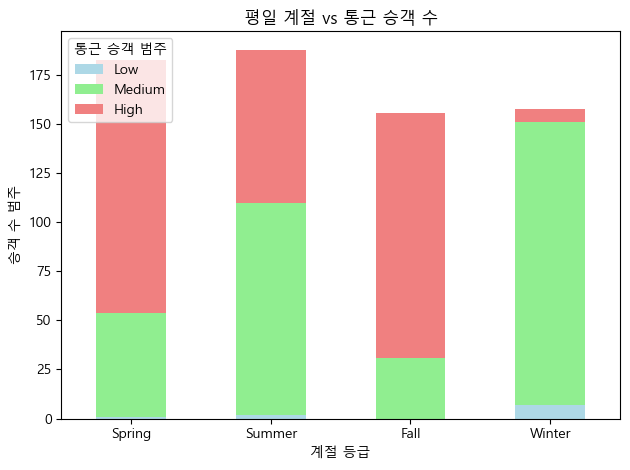

<Figure size 1200x600 with 0 Axes>

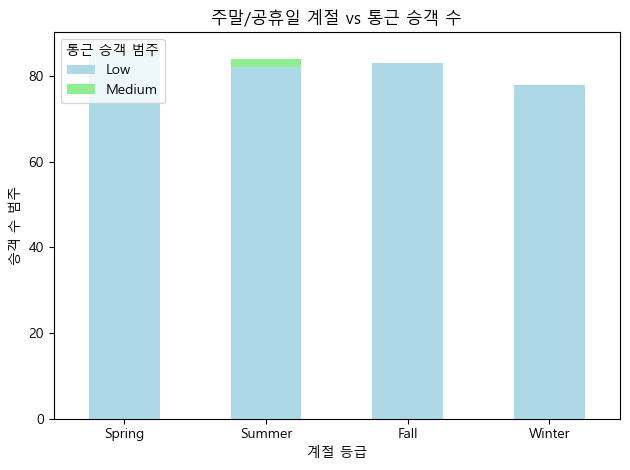

<Figure size 1200x600 with 0 Axes>

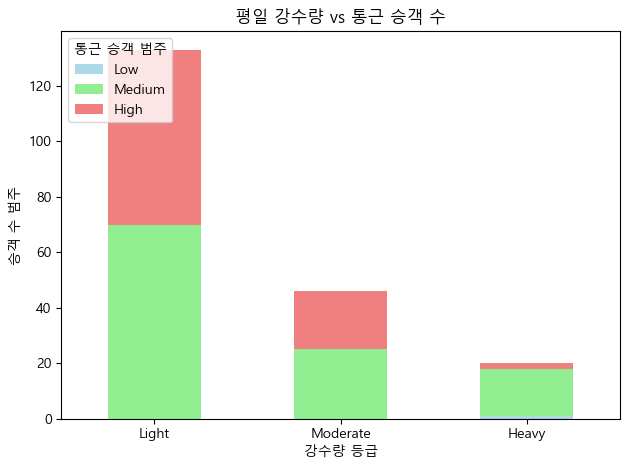

<Figure size 1200x600 with 0 Axes>

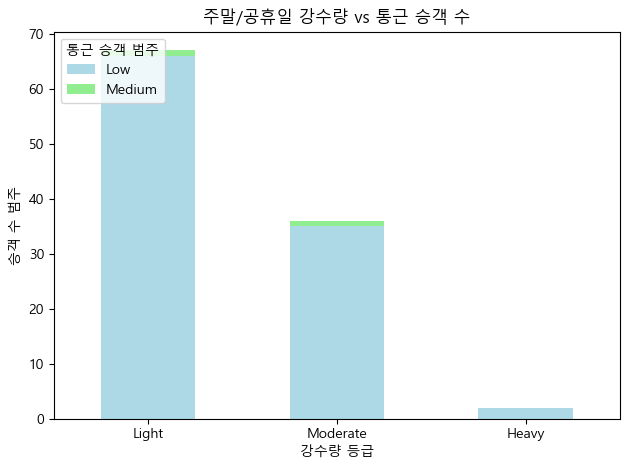

<Figure size 1200x600 with 0 Axes>

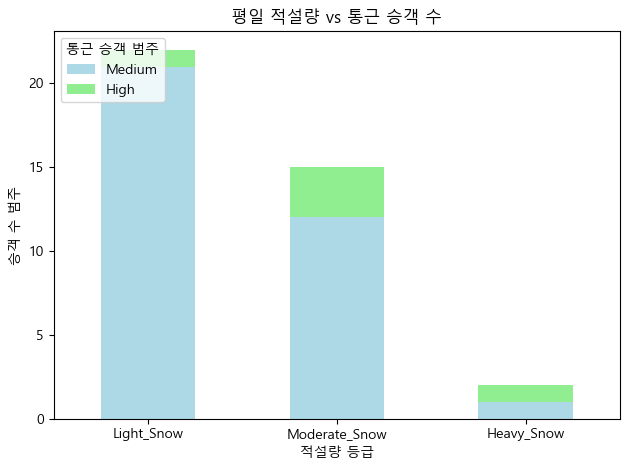

<Figure size 1200x600 with 0 Axes>

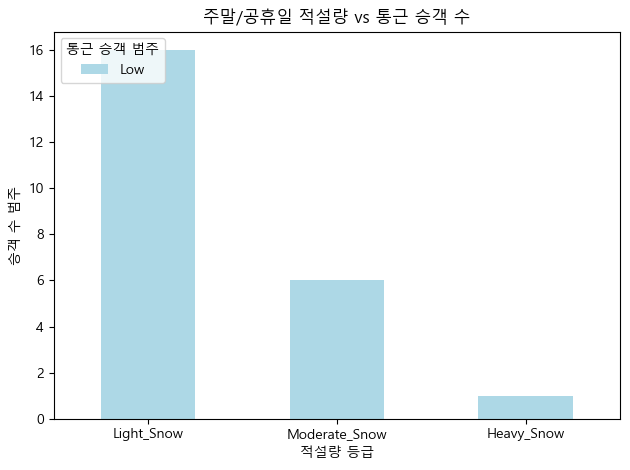

In [61]:
# 교차표 결과를 바 차트로 시각화하는 함수
def plot_chi2_results(weekday_contingency, weekend_contingency, category_name):
    # 평일 그래프
    plt.figure(figsize=(12, 6))
    weekday_contingency.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'lightcoral'])
    plt.title(f"평일 {category_name} vs 통근 승객 수")
    plt.xlabel(f"{category_name} 등급")
    plt.ylabel('승객 수 범주')
    plt.xticks(rotation=0)
    plt.legend(title='통근 승객 범주', loc='upper left')
    plt.tight_layout()
    plt.show()

    # 주말/공휴일 그래프
    plt.figure(figsize=(12, 6))
    weekend_contingency.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'lightcoral'])
    plt.title(f"주말/공휴일 {category_name} vs 통근 승객 수")
    plt.xlabel(f"{category_name} 등급")
    plt.ylabel('승객 수 범주')
    plt.xticks(rotation=0)
    plt.legend(title='통근 승객 범주', loc='upper left')
    plt.tight_layout()
    plt.show()

# 그래프 실행 - 계절 분석
plot_chi2_results(weekday_season_cont, weekend_season_cont, '계절')

# 그래프 실행 - 강수량 분석
plot_chi2_results(weekday_precip_cont, weekend_precip_cont, '강수량')

# 그래프 실행 - 적설량 분석
plot_chi2_results(weekday_snow_cont, weekend_snow_cont, '적설량')


기온이랑 비교해보기

In [62]:
temp_df = pd.read_csv('data/temperature.csv')
temp_df

,Unnamed: 0,date,avg_temp,min_temp,max_temp,day_type,season,year,at_grade
0,0,2021-01-01,-4.2,-9.8,1.6,Weekend,Winter,2021,cold
1,1,2021-01-02,-5.0,-8.4,-1.4,Weekend,Winter,2021,cold
2,2,2021-01-03,-5.6,-9.1,-2.0,Weekend,Winter,2021,cold
3,3,2021-01-04,-3.5,-8.4,0.3,Weekday,Winter,2021,cold
4,4,2021-01-05,-5.5,-9.9,-2.1,Weekday,Winter,2021,cold
...,...,...,...,...,...,...,...,...,...
1394,1394,2024-10-26,17.0,10.7,24.0,Weekend,Fall,2024,warm
1395,1395,2024-10-27,16.0,14.0,18.8,Weekend,Fall,2024,warm
1396,1396,2024-10-28,15.7,12.3,20.4,Weekday,Fall,2024,warm
1397,1397,2024-10-29,15.0,13.4,18.3,Weekday,Fall,2024,warm


In [63]:
temp_df = temp_df[['date', 'avg_temp', 'min_temp', 'max_temp', 'at_grade']]
temp_df['date'] = pd.to_datetime(temp_df['date'])
temp_df = temp_df.iloc[365:1399, :]

C:\Users\human\AppData\Local\Temp\ipykernel_15180\2659993384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = pd.to_datetime(temp_df['date'])


In [64]:
all_df = pd.merge(passenger_and_weather, temp_df, how='outer', on='date')
all_df

,date,total,total_commute,total_other,fine_dust,precipitation,snow_depth,fd_grade,p_grade,s_grade,year,season,holiday_or_weekend,other_category,avg_temp,min_temp,max_temp,at_grade
0,2022-01-01,3651679.0,1022156.0,2629523.0,34.000000,0.0,0.0,Normal,Dry,No_Snow,2022.0,Winter,1.0,Low,-4.3,-10.2,2.3,cold
1,2022-01-02,4101840.0,1187552.0,2914288.0,42.000000,0.3,0.5,Normal,Light,Light_Snow,2022.0,Winter,1.0,Low,-1.3,-5.2,3.0,cold
2,2022-01-03,8516383.0,4079852.0,4436531.0,28.000000,0.0,0.0,Good,Dry,No_Snow,2022.0,Winter,0.0,Medium,-1.9,-8.0,2.5,cold
3,2022-01-04,8799020.0,4139897.0,4659123.0,37.000000,0.0,0.0,Normal,Dry,No_Snow,2022.0,Winter,0.0,Medium,-2.5,-5.6,1.0,cold
4,2022-01-05,8799020.0,4139897.0,4659123.0,52.000000,0.0,0.0,Normal,Dry,No_Snow,2022.0,Winter,0.0,Medium,-2.8,-7.8,1.9,cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2024-10-26,8588182.0,2551611.0,6036571.0,26.000000,0.0,0.0,Good,Dry,No_Snow,2024.0,Fall,1.0,Low,17.0,10.7,24.0,warm
1030,2024-10-27,6481714.0,1840139.0,4641575.0,27.000000,0.0,0.0,Good,Dry,No_Snow,2024.0,Fall,1.0,Low,16.0,14.0,18.8,warm
1031,2024-10-28,10545933.0,4688464.0,5857469.0,38.000000,0.0,0.0,Normal,Dry,No_Snow,2024.0,Fall,0.0,High,15.7,12.3,20.4,warm
1032,2024-10-29,10814106.0,4787218.0,6026888.0,28.840909,0.0,0.0,Good,Dry,No_Snow,2024.0,Fall,0.0,High,15.0,13.4,18.3,warm


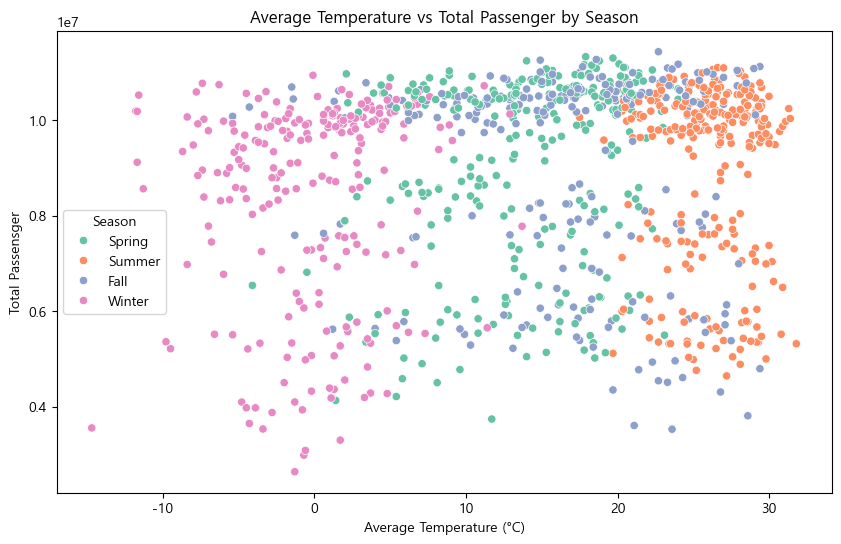

In [65]:
# 평균기온과 전체 승객 수의 관계

plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='total', data=all_df, hue='season', palette='Set2')
plt.title('Average Temperature vs Total Passenger by Season')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Passensger')
plt.legend(title='Season')
plt.show()


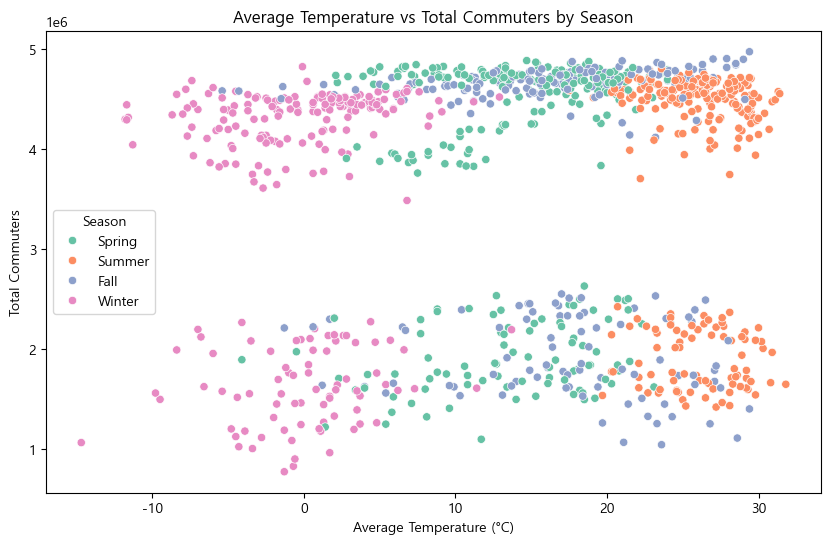

In [66]:
# 평균기온과 통근 승객 수의 관계

plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='total_commute', data=all_df, hue='season', palette='Set2')
plt.title('Average Temperature vs Total Commuters by Season')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Commuters')
plt.legend(title='Season')
plt.show()


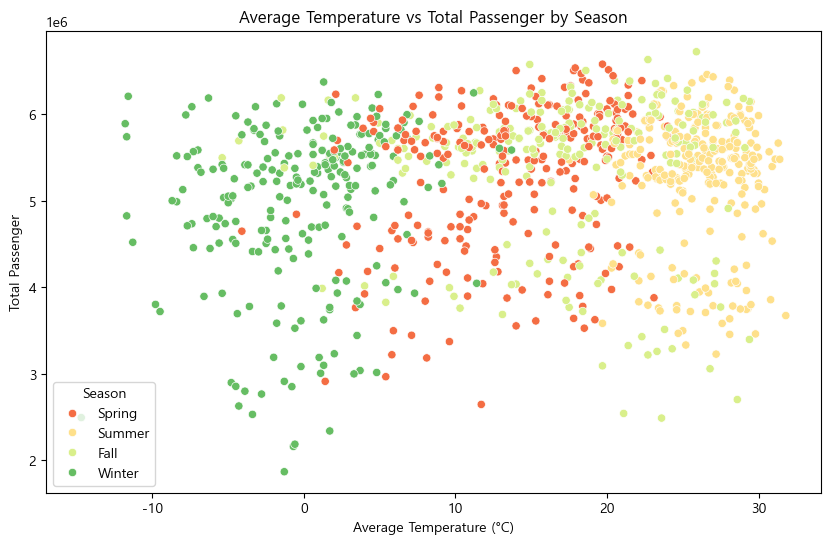

In [67]:
# 평균기온과 미통근 승객 수의 관계

plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_temp', y='total_other', data=all_df, hue='season', palette='RdYlGn')
plt.title('Average Temperature vs Total Passenger by Season')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Passenger')
plt.legend(title='Season')
plt.show()


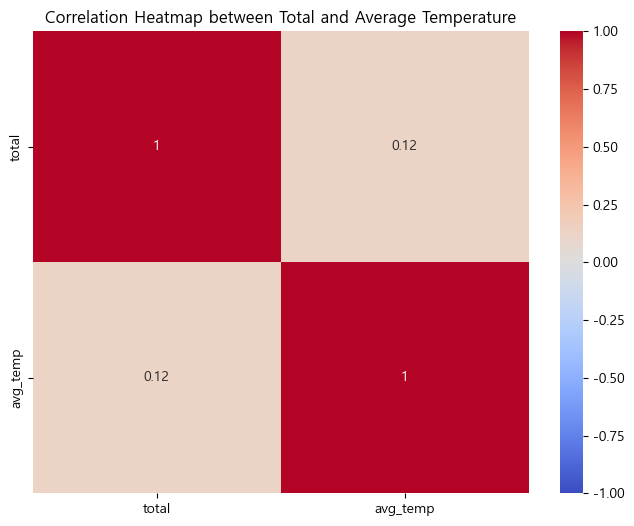

In [68]:
# total과 avg_temp 간의 상관계수 계산

corr_matrix = all_df[['total', 'avg_temp']].corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Total and Average Temperature')
plt.show()

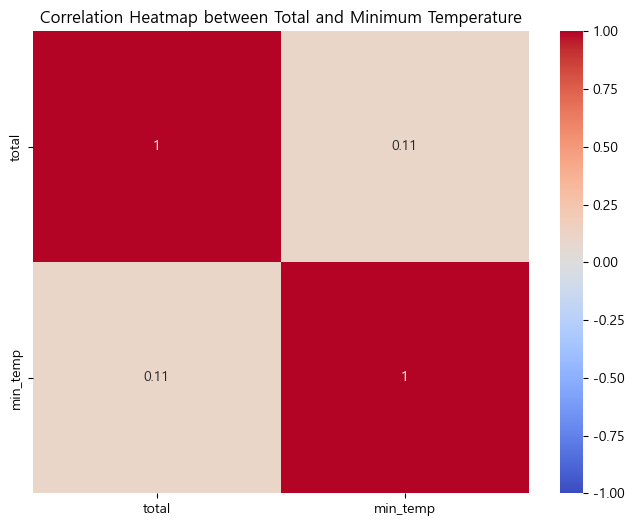

In [69]:
# total과 min_temp 간의 상관계수 계산

corr_matrix = all_df[['total', 'min_temp']].corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Total and Minimum Temperature')
plt.show()

In [70]:
all_df.columns

Index(['date', 'total', 'total_commute', 'total_other', 'fine_dust',
       'precipitation', 'snow_depth', 'fd_grade', 'p_grade', 's_grade', 'year',
       'season', 'holiday_or_weekend', 'other_category', 'avg_temp',
       'min_temp', 'max_temp', 'at_grade'],
      dtype='object')

In [71]:
c_at_grade = ['very_cold', 'cold', 'mild', 'warm', 'hot']
c_at_grade1 = CategoricalDtype(categories = c_at_grade, ordered = True)
all_df["at_grade"] = all_df["at_grade"].astype(c_at_grade1)


In [72]:
# 통근승객과 평균기온의 카이제곱 검정

# 승객 데이터 범주화 및 교차표 생성 함수
def create_contingency_tables(df, category_col, filter_non_zero=False):
    """
    데이터프레임에서 승객 데이터를 범주화하고 교차표 생성
    
    Args:
        df: 분석할 데이터프레임
        category_col: 분석할 범주형 컬럼명 (예: 'season', 'p_grade', 's_grade')
        filter_non_zero: True인 경우, 해당 범주 컬럼에서 0이 아닌 값만 필터링
    """
    # 통근 승객 수를 3분위수로 범주화
    df['other_category'] = pd.qcut(df['total_commute'], q=3, labels=['Low', 'Medium', 'High'])
    
    # 평일/주말 데이터 분리
    weekday_data = df[df['holiday_or_weekend'] == 0]
    weekend_data = df[df['holiday_or_weekend'] == 1]
    
    # 교차표 생성
    weekday_contingency = pd.crosstab(weekday_data[category_col], weekday_data['other_category'])
    weekend_contingency = pd.crosstab(weekend_data[category_col], weekend_data['other_category'])
    
    return weekday_contingency, weekend_contingency

# 카이제곱 검정 및 결과 출력 함수
def perform_chi2_test(weekday_contingency, weekend_contingency, category_name):
    """
    교차표에 대해 카이제곱 검정을 수행하고 결과 출력
    
    Args:
        weekday_contingency: 평일 교차표
        weekend_contingency: 주말 교차표
        category_name: 분석 중인 범주의 이름 (예: '계절', '강수량', '적설량')
    """
    # 평일 분석
    weekday_chi2, weekday_p, weekday_dof, weekday_expected = chi2_contingency(weekday_contingency)
    
    # 주말 분석
    weekend_chi2, weekend_p, weekend_dof, weekend_expected = chi2_contingency(weekend_contingency)
    
    print(f"=== 평일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekday_contingency)
    print(f"\n카이제곱 통계량: {weekday_chi2:.2f}")
    print(f"p-value: {weekday_p:.4f}")
    
    print(f"\n=== 주말/공휴일 {category_name} 분석 ===")
    print("\n교차표:")
    print(weekend_contingency)
    print(f"\n카이제곱 통계량: {weekend_chi2:.2f}")
    print(f"p-value: {weekend_p:.4f}")

# 실행 코드 - 계절 분석
weekday_season_cont, weekend_season_cont = create_contingency_tables(all_df, 'at_grade')
perform_chi2_test(weekday_season_cont, weekend_season_cont, '평균기온')


=== 평일 평균기온 분석 ===

교차표:
other_category  Low  Medium  High
at_grade                         
very_cold         0       5     0
cold              4      67     5
mild              3     121   106
warm              3     134   228
hot               0       9     0

카이제곱 통계량: 99.98
p-value: 0.0000

=== 주말/공휴일 평균기온 분석 ===

교차표:
other_category  Low  Medium
at_grade                   
very_cold         1       0
cold             39       0
mild            109       0
warm            174       2
hot               6       0

카이제곱 통계량: 1.77
p-value: 0.7776


In [73]:
# 이 결과는 두 가지 상황에서 "평일 평균기온"과 "주말/공휴일 평균기온" 간의 관계를 분석한 것입니다.
# 교차표와 카이제곱 검정을 통해 두 변수(기온 등급과 다른 카테고리 변수) 간의 독립성 여부를 평가한 결과

# ### 1. 평일 평균기온 분석
# `at_grade` (기온 등급)과 `other_category` (비통근 승객 수) 간의 관계를 나타낸 표입니다. 
# 예를 들어, "mild" 기온 등급에서 대부분의 값들이 "Medium"과 "High"로 분포하고 있으며, 
# "very_cold" 기온에서는 "Low" 등급이 매우 적습니다.

# #### 카이제곱 통계량: 99.98  
# #### p-value: 0.0000
# **카이제곱 통계량**이 99.98로 매우 높고, **p-value**가 0.0000입니다.  
# 이는 두 변수(`at_grade`와 `other_category`) 간에 **유의미한 관계**가 있다는 것을 의미합니다. 
# 즉, 기온 등급과 다른 카테고리 변수 간에는 통계적으로 유의미한 상관관계가 존재합니다.
# **p-value가 0.05보다 매우 작으므로, 귀무가설(두 변수는 독립적이다)을 기각**하고,
# 두 변수는 상호 의존적이라고 결론 지을 수 있습니다.

# ### 2. 주말/공휴일 평균기온 분석
# `at_grade`와 `other_category`(비통근 승객 수) 간의 관계를 나타낸 표입니다. 
# 여기서 주말/공휴일의 기온 분포는 대부분 "Low" 등급으로 분포하고 있습니다.

# #### 카이제곱 통계량: 1.77  
# #### p-value: 0.7776
# **카이제곱 통계량**은 1.77로 상대적으로 낮고, **p-value**가 0.7776입니다.
# **p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없습니다.** 
# 즉, 기온 등급과 다른 카테고리 변수 간에 통계적으로 유의미한 관계가 없다고 볼 수 있습니다. 
# 두 변수는 독립적일 가능성이 높습니다.

# ### 결론:
# **평일 평균기온 분석**에서는 기온 등급과 비통근 승객 수 간에 **강한 유의미한 관계**가 있다는 결론
# **주말/공휴일 평균기온 분석**에서는 기온 등급과 비통근 승객 수 간에 **유의미한 관계가 없다**는 결론


<Figure size 1200x600 with 0 Axes>

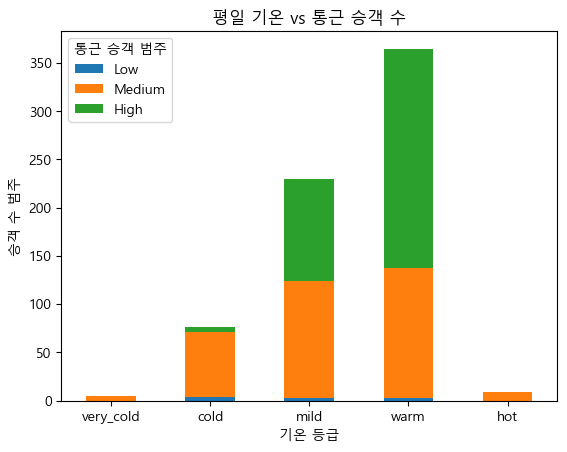

<Figure size 1200x600 with 0 Axes>

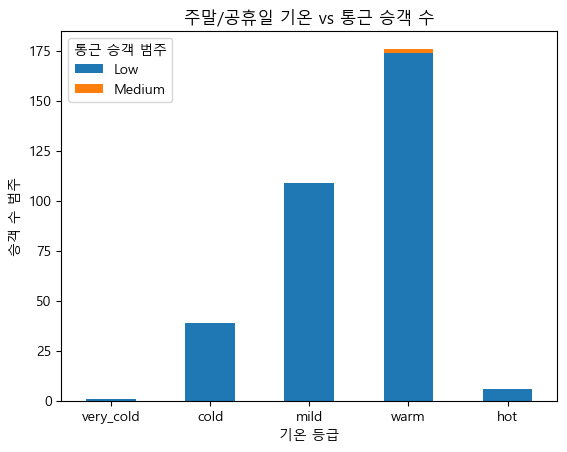

In [74]:
# 평일과 주말/공휴일 교차표에서 인덱스와 열을 바탕으로 그래프 그리기
def plot_chi2_results(weekday_contingency, weekend_contingency, category_name):
    # 평일 그래프
    plt.figure(figsize=(12, 6))
    weekday_contingency.plot(kind='bar', stacked=True)
    plt.title(f"평일 {category_name} vs 통근 승객 수")
    plt.xlabel(f"{category_name} 등급")
    plt.ylabel('승객 수 범주')
    plt.xticks(rotation=0)
    plt.legend(title='통근 승객 범주', loc='upper left')
    plt.show()

    # 주말/공휴일 그래프
    plt.figure(figsize=(12, 6))
    weekend_contingency.plot(kind='bar', stacked=True)
    plt.title(f"주말/공휴일 {category_name} vs 통근 승객 수")
    plt.xlabel(f"{category_name} 등급")
    plt.ylabel('승객 수 범주')
    plt.xticks(rotation=0)
    plt.legend(title='통근 승객 범주', loc='upper left')
    plt.show()

# 그래프 실행
plot_chi2_results(weekday_season_cont, weekend_season_cont, '기온')
